In [1]:
import numpy as np  # probably don't need to load
import pandas as pd
import datetime as dt
#import pandas_datareader.data as web  # probably don't need to load
#import quandl

#import blpapi
#from xbbg import blp
import CLOutilsPyXLL as clo

#import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [287]:
path = 'Z:/Shared/Risk Management and Investment Technology/CLO Optimization/'
file = 'CLO17 portfolio as of 6.1.21.xlsm'
filepath= path+file
CLO_tab = 'CLO 17 Port as of 6.1'
Bid_tab = 'Bid.Ask 6.1'


# Create Model Portfolio Dataframe

In [347]:
import importlib
importlib.reload(clo)

<module 'CLOutilsPyXLL' from 'C:\\Users\\jknechtel\\Miniconda3\\RM-IT\\CLOutilsPyXLL.py'>

In [312]:
model_port = clo.create_model_port_df(filepath)


C:\Users\jknechtel\Miniconda3\RM-IT\CLOutilsPyXLL.py:231: RuntimeWarning: invalid value encountered in double_scalars
  apply(lambda x: 100*((x[0]*x[1]/100)+(x[2]*x[3]/100))/(x[0]+x[2]),axis=1) #I get runtime warnings often (prob div by 0)
C:\Users\jknechtel\Miniconda3\RM-IT\CLOutilsPyXLL.py:240: RuntimeWarning: invalid value encountered in double_scalars
  ((x[0]*x[5]/100+(x[6]+x[1])*x[2])/x[3])*100,axis=1 )  #I get runtime warnings often


skipped the zz_LXREP line drops


In [344]:
dicttest = {'Cash to spend/raise':0,
            'Par Build(+) Loss(-) Limit':-2000000,
            'Max trade size (on buys)':1000000}

dicttest['Par Build(+) Loss(-) Limit']


-2000000

In [349]:
clo.Port_stats(model_port,weight_col='Par_no_default',format_output=False)

Portfolio Stats
Min Floating Spread Test - no Libor Floors       3.370173e+00
Min Floating Spread Test - With Libor Floors     3.616031e+00
Max Moodys Rating Factor Test (NEW WARF)         2.772156e+03
Max Moodys Rating Factor Test (Orig WARF)        2.923891e+03
Min Moodys Recovery Rate Test                    4.807768e+01
Min S&P Recovery Rate Class A-1a                 4.133893e+01
Moodys Diversity Test                            8.645490e+01
WAP                                              9.887454e+01
Percent C                                        3.914402e+00
Percent 2nd Lien                                 7.165790e-01
Percent Sub80                                    2.017392e-01
Percent Sub90                                    1.635859e+00
Percent CovLite                                  8.153115e+00
Total Portfolio Par (excl. Defaults)             5.047445e+08

In [310]:
clo.get_pot_trades(filepath,sheet='Model Portfolio')

KeyError: "None of ['LXID'] are in the columns"

In [144]:
#model_port = 
#model_port.drop(model_port[model_port['Issuer'].str.match('zz_LXREP')].index)
model_port.columns

Index(['Combined', 'Parent Company', 'Issuer', 'Asset', 'Analyst', 'Spread',
       'Floor', 'All In Rate', 'Maturity Date', 'Mark Price',
       ...
       'MC WARF', 'MC Div Score', 'MC WAS', 'MC WAPP', 'Categorical', 'Lien',
       'CovLite', 'C_or_Less', 'Sub80', 'Sub90'],
      dtype='object', length=101)

In [6]:
model_port
model_port[(model_port['Current Portfolio']>1000)|(model_port['Current Portfolio']==0)]  #|(model_port['Current Portfolio']>1000)
len(model_port.loc[~((model_port['Current Portfolio']>0)&(model_port['Current Portfolio']<1000))])

Combined  \
LXID                                                          
LX190245  CNT Holdings I Corp - Initial Term Loan (Secon...   
LX190219  CNT Holdings I Corp - Initial Term Loan (First...   
LX175827  8th Avenue Food & Provisions, Inc. - Term Loan...   
LX193380             AAdvantage Loyalty IP Ltd. - Term Loan   
LX191328  Pluto Acquisition I, Inc. (aka AccentCare, Inc...   
...                                                     ...   
LX193419  BW Gas & Convenience Holdings, LLC - Initial T...   
LX185593  Zayo Group Holdings, Inc. - Initial Dollar Ter...   
LX192354  Zelis Cost Management Buyer, Inc. - Term B-1 Loan   
LX167827  Acuity Specialty Products, Inc. (aka Zep Inc.)...   
LX185219  Ziggo Financing Partnership - Term Loan I Faci...   

                              Parent Company  \
LXID                                           
LX190245                      1-800 Contacts   
LX190219                      1-800 Contacts   
LX175827  8th Avenue Food & Provisions, Inc.   
LX193380          AAdvantage Loyalty IP Ltd.   
LX191328                          Accentcare   
...                                      ...   
LX193419                              Yesway   
LX185593           Zayo Group Holdings, Inc.   
LX192354   Zelis Cost Management Buyer, Inc.   
LX167827                                 Zep   
LX185219                               Ziggo   

                                                    Issuer  \
LXID                                                         
LX190245                               CNT Holdings I Corp   
LX190219                               CNT Holdings I Corp   
LX175827                8th Avenue Food & Provisions, Inc.   
LX193380                        AAdvantage Loyalty IP Ltd.   
LX191328  Pluto Acquisition I, Inc. (aka AccentCare, Inc.)   
...                                                    ...   
LX193419                BW Gas & Convenience Holdings, LLC   
LX185593                         Zayo Group Holdings, Inc.   
LX192354                 Zelis Cost Management Buyer, Inc.   
LX167827    Acuity Specialty Products, Inc. (aka Zep Inc.)   
LX185219                       Ziggo Financing Partnership   

                                            Asset            Analyst  Spread  \
LXID                                                                           
LX190245          Initial Term Loan (Second Lien)     Adey Delbridge  0.0675   
LX190219           Initial Term Loan (First Lien)     Adey Delbridge  0.0375   
LX175827                   Term Loan (First Lien)        Rekha Nayar  0.0350   
LX193380                                Term Loan                NaN  0.0475   
LX191328  2020 Incremental Term Loan (First Lien)     Adey Delbridge  0.0500   
...                                           ...                ...     ...   
LX193419                        Initial Term Loan        Rekha Nayar  0.0350   
LX185593                 Initial Dollar Term Loan    Andrew Scheffer  0.0300   
LX192354                            Term B-1 Loan        Sooji  Park  0.0350   
LX167827           Initial Term Loan (First Lien)  Bala Ramakrishnan  0.0400   
LX185219                     Term Loan I Facility    Rosalind Dalton  0.0250   

           Floor  All In Rate Maturity Date  Mark Price  ...  \
LXID                                                     ...   
LX190245  0.0075     0.075000    2028-11-06     101.000  ...   
LX190219  0.0075     0.045000    2027-11-08      99.792  ...   
LX175827  0.0000     0.037234    2025-10-01      99.896  ...   
LX193380     NaN     0.049740    2028-03-10      99.000  ...   
LX191328  0.0050     0.055000    2026-06-22     100.000  ...   
...          ...          ...           ...         ...  ...   
LX193419  0.0050     0.040000    2028-03-31     100.250  ...   
LX185593  0.0000     0.032177    2027-03-09      99.174  ...   
LX192354  0.0000     0.037153    2026-09-30      99.722  ...   
LX167827  0.0100     0.050000    2024-08-12      98.71

Combined  \
LXID                                                          
LX190245  CNT Holdings I Corp - Initial Term Loan (Secon...   
LX190219  CNT Holdings I Corp - Initial Term Loan (First...   
LX175827  8th Avenue Food & Provisions, Inc. - Term Loan...   
LX193380             AAdvantage Loyalty IP Ltd. - Term Loan   
LX191328  Pluto Acquisition I, Inc. (aka AccentCare, Inc...   
...                                                     ...   
LX193419  BW Gas & Convenience Holdings, LLC - Initial T...   
LX185593  Zayo Group Holdings, Inc. - Initial Dollar Ter...   
LX192354  Zelis Cost Management Buyer, Inc. - Term B-1 Loan   
LX167827  Acuity Specialty Products, Inc. (aka Zep Inc.)...   
LX185219  Ziggo Financing Partnership - Term Loan I Faci...   

                              Parent Company  \
LXID                                           
LX190245                      1-800 Contacts   
LX190219                      1-800 Contacts   
LX175827  8th Avenue Food & Provisions, Inc.   
LX193380          AAdvantage Loyalty IP Ltd.   
LX191328                          Accentcare   
...                                      ...   
LX193419                              Yesway   
LX185593           Zayo Group Holdings, Inc.   
LX192354   Zelis Cost Management Buyer, Inc.   
LX167827                                 Zep   
LX185219                               Ziggo   

                                                    Issuer  \
LXID                                                         
LX190245                               CNT Holdings I Corp   
LX190219                               CNT Holdings I Corp   
LX175827                8th Avenue Food & Provisions, Inc.   
LX193380                        AAdvantage Loyalty IP Ltd.   
LX191328  Pluto Acquisition I, Inc. (aka AccentCare, Inc.)   
...                                                    ...   
LX193419                BW Gas & Convenience Holdings, LLC   
LX185593                         Zayo Group Holdings, Inc.   
LX192354                 Zelis Cost Management Buyer, Inc.   
LX167827    Acuity Specialty Products, Inc. (aka Zep Inc.)   
LX185219                       Ziggo Financing Partnership   

                                            Asset            Analyst  Spread  \
LXID                                                                           
LX190245          Initial Term Loan (Second Lien)     Adey Delbridge  0.0675   
LX190219           Initial Term Loan (First Lien)     Adey Delbridge  0.0375   
LX175827                   Term Loan (First Lien)        Rekha Nayar  0.0350   
LX193380                                Term Loan                NaN  0.0475   
LX191328  2020 Incremental Term Loan (First Lien)     Adey Delbridge  0.0500   
...                                           ...                ...     ...   
LX193419                        Initial Term Loan        Rekha Nayar  0.0350   
LX185593                 Initial Dollar Term Loan    Andrew Scheffer  0.0300   
LX192354                            Term B-1 Loan        Sooji  Park  0.0350   
LX167827           Initial Term Loan (First Lien)  Bala Ramakrishnan  0.0400   
LX185219                     Term Loan I Facility    Rosalind Dalton  0.0250   

           Floor  All In Rate Maturity Date  Mark Price  ...  \
LXID                                                     ...   
LX190245  0.0075     0.075000    2028-11-06     101.000  ...   
LX190219  0.0075     0.045000    2027-11-08      99.792  ...   
LX175827  0.0000     0.037234    2025-10-01      99.896  ...   
LX193380     NaN     0.049740    2028-03-10      99.000  ...   
LX191328  0.0050     0.055000    2026-06-22     100.000  ...   
...          ...          ...           ...         ...  ...   
LX193419  0.0050     0.040000    2028-03-31     100.250  ...   
LX185593  0.0000     0.032177    2027-03-09      99.174  ...   
LX192354  0.0000     0.037153    2026-09-30      99.722  ...   
LX167827  0.0100     0.050000    2024-08-12      98.71

462

In [7]:
trade = -1e6
model_port.loc[model_port['Current Portfolio']>0,['Current Portfolio','Bid','Actual Purch Price of Current Positions']].\
        apply(lambda x: ((-min(trade,x[0])*x[1]/100)-(-min(trade,x[0])*x[2])),axis=1)

LXID
LX175827    -4530.0
LX193380    45380.0
LX191328    10000.0
LX190422     9690.0
LX193944     2190.0
             ...   
LX193284    -6250.0
LX193419    12500.0
LX185593     7120.0
LX192354    -2650.0
LX185219    -9030.0
Length: 340, dtype: float64

In [8]:
clo.mil_parburn_new(model_port,pot_trade_size=1e6)

Combined  \
LXID                                                          
LX190245  CNT Holdings I Corp - Initial Term Loan (Secon...   
LX190219  CNT Holdings I Corp - Initial Term Loan (First...   
LX175827  8th Avenue Food & Provisions, Inc. - Term Loan...   
LX193380             AAdvantage Loyalty IP Ltd. - Term Loan   
LX191328  Pluto Acquisition I, Inc. (aka AccentCare, Inc...   
...                                                     ...   
LX193419  BW Gas & Convenience Holdings, LLC - Initial T...   
LX185593  Zayo Group Holdings, Inc. - Initial Dollar Ter...   
LX192354  Zelis Cost Management Buyer, Inc. - Term B-1 Loan   
LX167827  Acuity Specialty Products, Inc. (aka Zep Inc.)...   
LX185219  Ziggo Financing Partnership - Term Loan I Faci...   

                              Parent Company  \
LXID                                           
LX190245                      1-800 Contacts   
LX190219                      1-800 Contacts   
LX175827  8th Avenue Food & Provisions, Inc.   
LX193380          AAdvantage Loyalty IP Ltd.   
LX191328                          Accentcare   
...                                      ...   
LX193419                              Yesway   
LX185593           Zayo Group Holdings, Inc.   
LX192354   Zelis Cost Management Buyer, Inc.   
LX167827                                 Zep   
LX185219                               Ziggo   

                                                    Issuer  \
LXID                                                         
LX190245                               CNT Holdings I Corp   
LX190219                               CNT Holdings I Corp   
LX175827                8th Avenue Food & Provisions, Inc.   
LX193380                        AAdvantage Loyalty IP Ltd.   
LX191328  Pluto Acquisition I, Inc. (aka AccentCare, Inc.)   
...                                                    ...   
LX193419                BW Gas & Convenience Holdings, LLC   
LX185593                         Zayo Group Holdings, Inc.   
LX192354                 Zelis Cost Management Buyer, Inc.   
LX167827    Acuity Specialty Products, Inc. (aka Zep Inc.)   
LX185219                       Ziggo Financing Partnership   

                                            Asset            Analyst  Spread  \
LXID                                                                           
LX190245          Initial Term Loan (Second Lien)     Adey Delbridge  0.0675   
LX190219           Initial Term Loan (First Lien)     Adey Delbridge  0.0375   
LX175827                   Term Loan (First Lien)        Rekha Nayar  0.0350   
LX193380                                Term Loan                NaN  0.0475   
LX191328  2020 Incremental Term Loan (First Lien)     Adey Delbridge  0.0500   
...                                           ...                ...     ...   
LX193419                        Initial Term Loan        Rekha Nayar  0.0350   
LX185593                 Initial Dollar Term Loan    Andrew Scheffer  0.0300   
LX192354                            Term B-1 Loan        Sooji  Park  0.0350   
LX167827           Initial Term Loan (First Lien)  Bala Ramakrishnan  0.0400   
LX185219                     Term Loan I Facility    Rosalind Dalton  0.0250   

           Floor  All In Rate Maturity Date  Mark Price  ...  \
LXID                                                     ...   
LX190245  0.0075     0.075000    2028-11-06     101.000  ...   
LX190219  0.0075     0.045000    2027-11-08      99.792  ...   
LX175827  0.0000     0.037234    2025-10-01      99.896  ...   
LX193380     NaN     0.049740    2028-03-10      99.000  ...   
LX191328  0.0050     0.055000    2026-06-22     100.000  ...   
...          ...          ...           ...         ...  ...   
LX193419  0.0050     0.040000    2028-03-31     100.250  ...   
LX185593  0.0000     0.032177    2027-03-09      99.174  ...   
LX192354  0.0000     0.037153    2026-09-30      99.722  ...   
LX167827  0.0100     0.050000    2024-08-12      98.71

In [30]:
model_port.loc[model_port['Current Portfolio']>0,['Mil_Par_BL_Sale','Current Portfolio']]

Mil_Par_BL_Sale  Current Portfolio
LXID                                        
LX175827           -830.0         1959899.69
LX193380          35380.0          750000.00
LX191328           5000.0          399997.50
LX190422           -310.0          155000.00
LX193944           -310.0         1204000.00
...                   ...                ...
LX193284          -6250.0          500000.00
LX193419           2500.0          475000.00
LX185593          -8180.0         2503614.04
LX192354          -2950.0         3761234.40
LX185219          -9030.0         2505000.00

[340 rows x 2 columns]

# Model Portfolio stats
- To potentially add:
- WAL (for test)
- Overcollateralization (for test)
- Interest Coverage Test

In [205]:
clo.Port_stats(model_port)

Portfolio Stats
Min Floating Spread Test - no Libor Floors             3.35%
Min Floating Spread Test - With Libor Floors           3.58%
Max Moodys Rating Factor Test (NEW WARF)                2772
Max Moodys Rating Factor Test (Orig WARF)               2944
Min Moodys Recovery Rate Test                          48.2%
Min S&P Recovery Rate Class A-1a                       41.7%
Moodys Diversity Test                                     87
WAP                                                   $99.01
Percent C                                               3.8%
Percent 2nd Lien                                        0.8%
Percent Sub80                                           0.0%
Percent Sub90                                           1.5%
Percent CovLite                                         9.4%
Total Portfolio Par (excl. Defaults)             499,303,478

In [215]:
#model_port.loc[model_port.index.str.match('US'),['Current Portfolio','Par_no_default']]
model_port.loc[model_port['Current Portfolio']>0,['Current Portfolio','Par_no_default']].count()

model_port[['Parent Company','Moodys Industry','Current Portfolio','Par_no_default']].\
    groupby(by=['Parent Company','Moodys Industry']).sum()

Current Portfolio    340
Par_no_default       340
dtype: int64

Current Portfolio  \
Parent Company                          Moodys Industry                                         
1-800 Contacts                          Healthcare & Pharmaceuticals                     0.00   
8th Avenue Food & Provisions, Inc.      Beverage, Food, & Tobacco                  1959899.69   
AAdvantage Loyalty IP Ltd.              Aerospace & Defense                         750000.00   
ALTICE FINANCING (Altice International) Media: Broadcasting & Subscription         1481008.76   
ALTICE US (CABLEVISION / CSC Holdings)  Media: Broadcasting & Subscription         3622079.75   
...                                                                                       ...   
Zayo Group Holdings, Inc.               Telecommunications                         2503614.04   
Zelis Cost Management Buyer, Inc.       Healthcare & Pharmaceuticals               3761234.40   
Zep                                     Chemicals, Plastics, & Rubber                    0.00   
Ziggo                                   Media: Broadcasting & Subscription         2505000.00   
eResearchTechnology, Inc.               Healthcare & Pharmaceuticals               2791927.44   

                                                                            Par_no_default  
Parent Company                          Moodys Industry                                     
1-800 Contacts                          Healthcare & Pharmaceuticals                  0.00  
8th Avenue Food & Provisions, Inc.      Beverage, Food, & Tobacco               1959899.69  
AAdvantage Loyalty IP Ltd.              Aerospace & Defense                      750000.00  
ALTICE FINANCING (Altice International) Media: Broadcasting & Subscription      1481008.76  
ALTICE US (CABLEVISION / CSC Holdings)  Media: Broadcasting & Subscription      3622079.75  
...                                                                                    ...  
Zayo Group Holdings, Inc.               Telecommunications                      2503614.04  
Zelis Cost Management Buyer, Inc.       Healthcare & Pharmaceuticals            3761234.40  
Zep                                     Chemicals, Plastics, & Rubber                 0.00  
Ziggo                                   Media: Broadcasting & Subscription      2505000.00  
eResearchTechnology, Inc.               Healthcare & Pharmaceuticals            2791927.44  

[342 rows x 2 columns]

In [199]:
clo.diversity_score(model_port, weight_col='Par_no_default')
clo.diversity_score(model_port, weight_col='Current Portfolio')
clo.diversity_score(model_port, weight_col='Now')
clo.diversity_score(model_port, weight_col='Total')

87.4933

87.4933

87.4933

87.4933

In [204]:
model_port.loc[model_port['Current Portfolio'].isna()]

Empty DataFrame
Columns: [Combined, Parent Company, Issuer, Asset, Analyst, Spread, Floor, All In Rate, Maturity Date, Mark Price, Adjusted Moodys Rating, WARF, Moodys CFR, Moodys Facility Rating, Moodys Issuer Outlook, Moodys Issuer Watch, Moodys Recovery Rate, S&P Issuer Rating, S&P Facility Rating, S&P Issuer Outlook, S&P Issuer Watch, S&P Recovery, Agent Bank, OCP CLO 2013-4, Ltd., OCP CLO 2014-5, Ltd., OCP CLO 2014-6, Ltd., OCP CLO 2014-7, Ltd., OCP CLO 2015-8, Ltd., OCP CLO 2015-9, Ltd. , OCP CLO 2015-10, Ltd. , OCP CLO 2016-11, Ltd., OCP CLO 2016-12, Ltd., OCP CLO 2017-13, Ltd., OCP CLO 2017-14, Ltd., OCP CLO 2018-15, Ltd., OCP CLO 2019-16, Ltd., OCP CLO 2019-17, Ltd, OCP CLO 2020-18, Ltd., OCP CLO 2020-19, Ltd., OCP CLO 2020-20, Ltd. whse, OCP CLO 2020-21, Ltd. whse, Current Global Amount Outstanding, Moodys Industry, S&P Industry, Lien Type, Issuer Country, Cov Lite, Default, Libor Contract, Loan Only, Comments, Moodys ADJ. CFR Score, Adjusted CFR Score, Adjusted CFR for WARF, Adj. WARF NEW, Quantity, Cost, Actual Purch Price of Current Positions, Price, Value, Value.1, (-Loss), Issuer Name, Deal Name, Facility, Maturity, Initial Spread, Bid, Ask, Evaluated Price, Close Depth, As of Date, Currency, Issuer & Facility Name, Potential Trades, Addtl Purchase Amt, Purch Price of Addtl Purch, S&P Recovery Rate (AAA), Adj. All in Rate, Current Portfolio, Total, Now, Mid, Blended Actual Purchase Prices, Blended Price, Par_Build_Loss_Sale, Par_Build_Loss_Buy, Total_Par_Build_Loss, Par_no_default, Mil_Par_BL_Sale, Mil_Par_BL_Buy, Mil_Par_Build_Loss, MC WARF, MC Div Score, MC WAS, MC WAPP, Categorical, Lien, CovLite, C_or_Less, ...]
Index: []

[0 rows x 102 columns]

In [203]:
#ind_avg_eu = clo.get_ind_avg_eu_table(filepath,sheet='Diversity')
#pstats = clo.Port_stats(model_port)
float(pstats.loc['Max Moodys Rating Factor Test (NEW WARF)'].values[0])

2772.0

In [200]:
clo.comp_Port_stats(model_port)

C:\Users\jknechtel\Miniconda3\RM-IT\CLOutilsPyXLL.py:195: RuntimeWarning: invalid value encountered in double_scalars
  wa = (model_df[cols[0]]*model_df[cols[1]]).sum()/model_df[cols[0]].sum()
C:\Users\jknechtel\Miniconda3\RM-IT\CLOutilsPyXLL.py:195: RuntimeWarning: invalid value encountered in double_scalars
  wa = (model_df[cols[0]]*model_df[cols[1]]).sum()/model_df[cols[0]].sum()


Current Portfolio  \
Min Floating Spread Test - no Libor Floors               3.35%   
Min Floating Spread Test - With Libor Floors             3.58%   
Max Moodys Rating Factor Test (NEW WARF)                  2772   
Max Moodys Rating Factor Test (Orig WARF)                 2944   
Min Moodys Recovery Rate Test                            48.2%   
Min S&P Recovery Rate Class A-1a                         41.7%   
Moodys Diversity Test                                       85   
WAP                                                     $99.01   
Percent C                                                 3.8%   
Percent 2nd Lien                                          0.8%   
Percent Sub80                                             0.0%   
Percent Sub90                                             1.5%   
Percent CovLite                                           9.4%   
Total Portfolio Par (excl. Defaults)               499,303,478   

                                             Potential Trades (incl Replines)  \
Min Floating Spread Test - no Libor Floors                               nan%   
Min Floating Spread Test - With Libor Floors                             nan%   
Max Moodys Rating Factor Test (NEW WARF)                                  nan   
Max Moodys Rating Factor Test (Orig WARF)                                 nan   
Min Moodys Recovery Rate Test                                            nan%   
Min S&P Recovery Rate Class A-1a                                         nan%   
Moodys Diversity Test                                                       0   
WAP                                                                      $nan   
Percent C                                                                nan%   
Percent 2nd Lien                                                         nan%   
Percent Sub80                                                            nan%   
Percent Sub90                                                            nan%   
Percent CovLite                                                          nan%   
Total Portfolio Par (excl. Defaults)                                        0   

                                             Total Portfolio (incl Trades)  
Min Floating Spread Test - no Libor Floors                           3.35%  
Min Floating Spread Test - With Libor Floors                         3.58%  
Max Moodys Rating Factor Test (NEW WARF)                              2772  
Max Moodys Rating Factor Test (Orig WARF)                             2944  
Min Moodys Recovery Rate Test                                        48.2%  
Min S&P Recovery Rate Class A-1a                                     41.7%  
Moodys Diversity Test                                                   87  
WAP                                                                 $99.01  
Percent C                                                             3.8%  
Percent 2nd Lien                                                      0.8%  
Percent Sub80                                                         0.0%  
Percent Sub90                                                         1.5%  
Percent CovLite                                                       9.4%  
Total Portfolio Par (excl. Defaults)                           499,303,478

In [202]:
#model_port.drop(columns='Desirability',inplace=True)
model_port.info()

<class 'pandas.core.frame.DataFrame'>
Index: 462 entries, LX190245 to LX185219
Columns: 102 entries, Combined to Sub90
dtypes: datetime64[ns](3), float64(62), int64(7), object(30)
memory usage: 371.8+ KB


In [97]:
# This is a killer trick!  Must remember!
importlib.reload(clo)
choicelist = ['Current', 'Potential']
model_port = clo.inside_outside(model_port,choicelist)

<module 'CLOutils' from 'C:\\Users\\jknechtel\\Miniconda3\\RM-IT\\CLOutils.py'>

# Exploratory Charts

## Pairplot of Key Stats

C:\Users\jknechtel\Miniconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\jknechtel\Miniconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


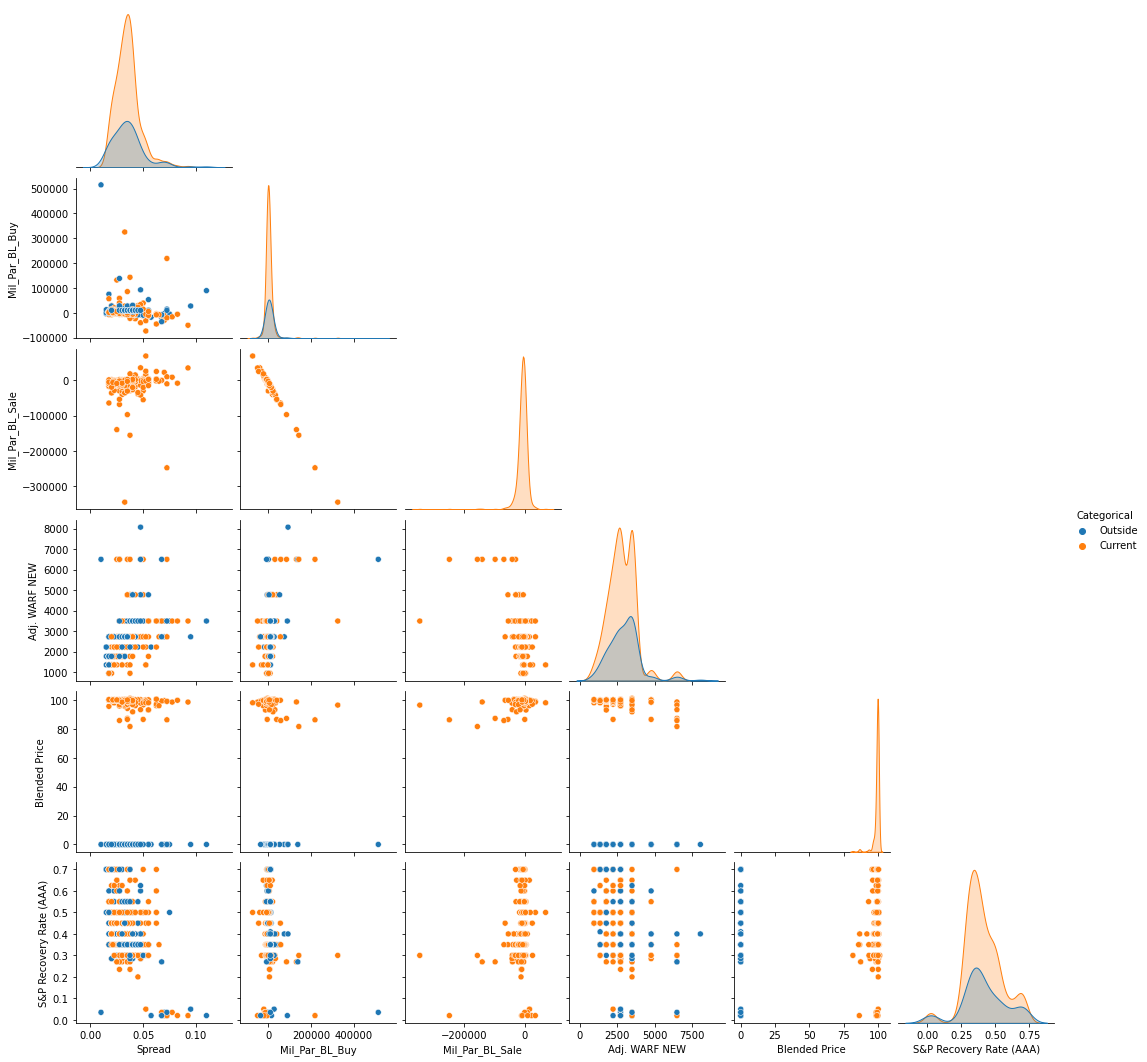

In [42]:
sns_plot = sns.pairplot(model_port[['Spread','Mil_Par_BL_Buy','Mil_Par_BL_Sale',
                                    'Adj. WARF NEW','Blended Price','S&P Recovery Rate (AAA)','Categorical']],
                        diag_kind="kde",corner = True, hue='Categorical')  #, diag_kind='kde''MC Div Score',
fig = sns_plot.fig
fig.savefig(path + "CLO_feature_PairPlot.png")

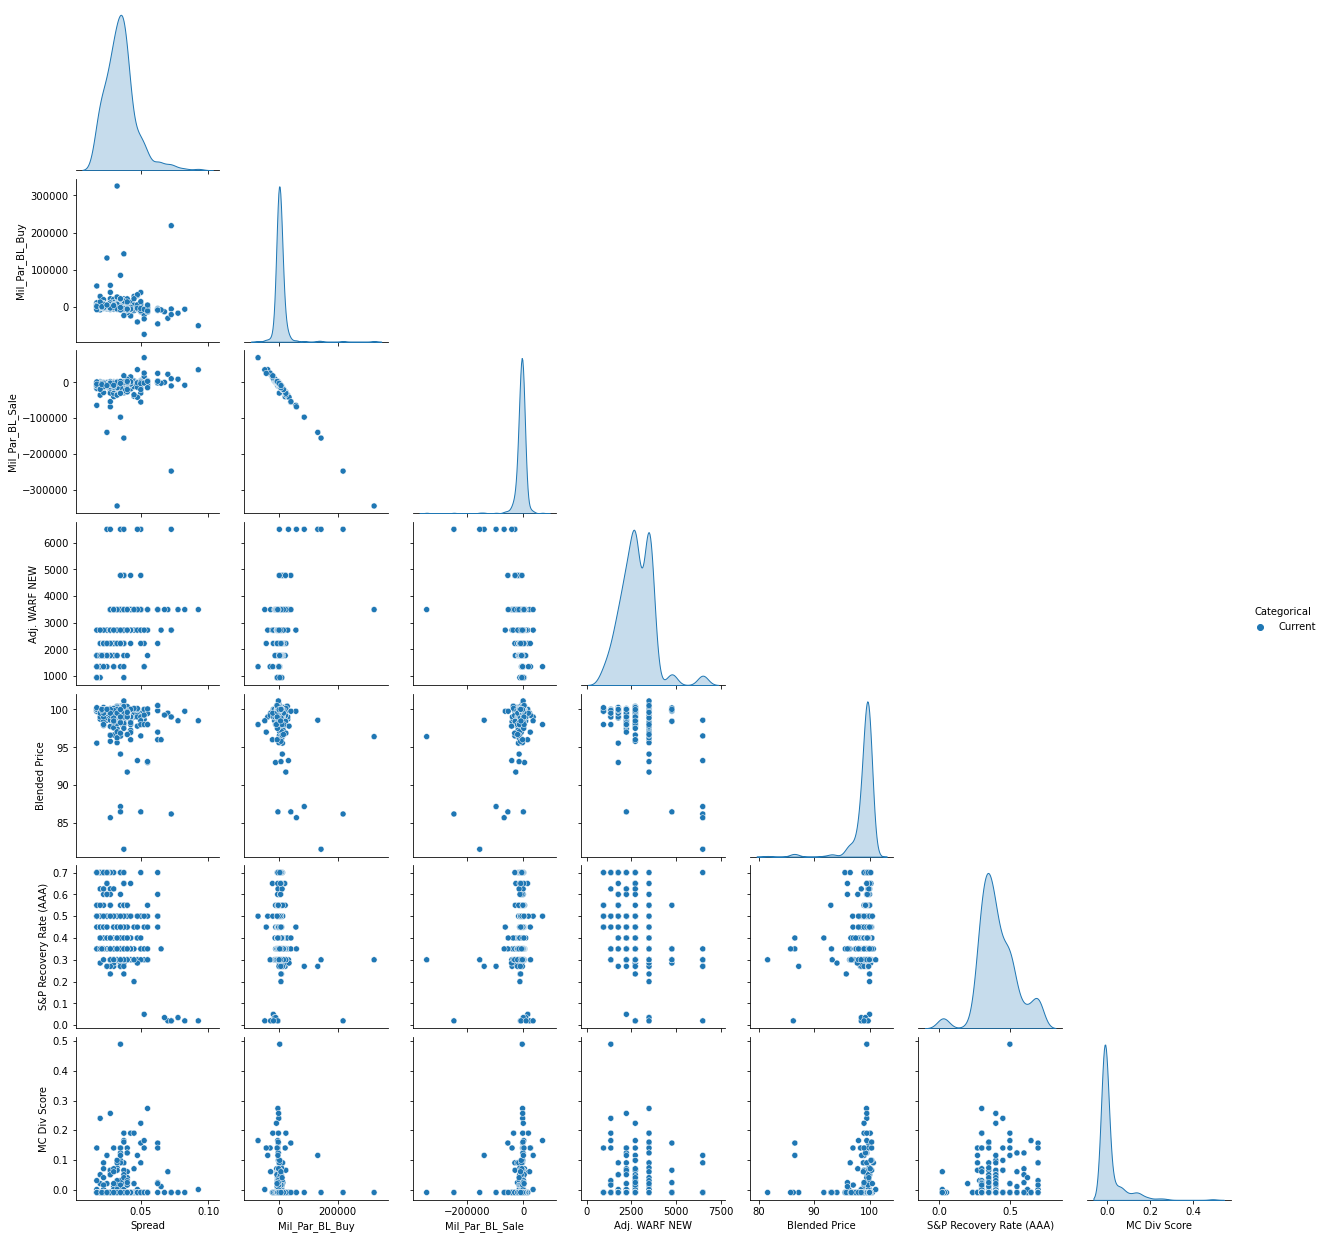

In [43]:
sns_plot = sns.pairplot(model_port.loc[model_port['Categorical']=='Current',['Spread','Mil_Par_BL_Buy','Mil_Par_BL_Sale',
                                    'Adj. WARF NEW','Blended Price','S&P Recovery Rate (AAA)',
                                    'MC Div Score','Categorical']],
                        diag_kind="kde",corner = True, hue='Categorical')  #, diag_kind='kde'

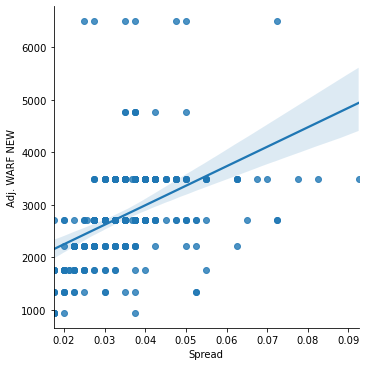

In [44]:
#sns.scatterplot(x = "Spread", y = "Adj. WARF NEW", data=model_port.loc[model_port['Categorical']=='Current'])
sns.lmplot(x = "Spread", y = "Adj. WARF NEW", data=model_port.loc[model_port['Categorical']=='Current'])

In [45]:
import plotly.express as px
#df = model_port[['Spread','Mil_Par_BL_Buy','Mil_Par_BL_Sale',
#                                    'Adj. WARF NEW','Blended Price','S&P Recovery Rate (AAA)','MC Div Score','Categorical']]
px.scatter_matrix(model_port[['Spread','Mil_Par_BL_Buy','Mil_Par_BL_Sale',
                                    'Adj. WARF NEW','Blended Price','S&P Recovery Rate (AAA)','MC Div Score','Categorical']])

## Pairplot of Key Marginal Stats

C:\Users\jknechtel\Miniconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\jknechtel\Miniconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\jknechtel\Miniconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


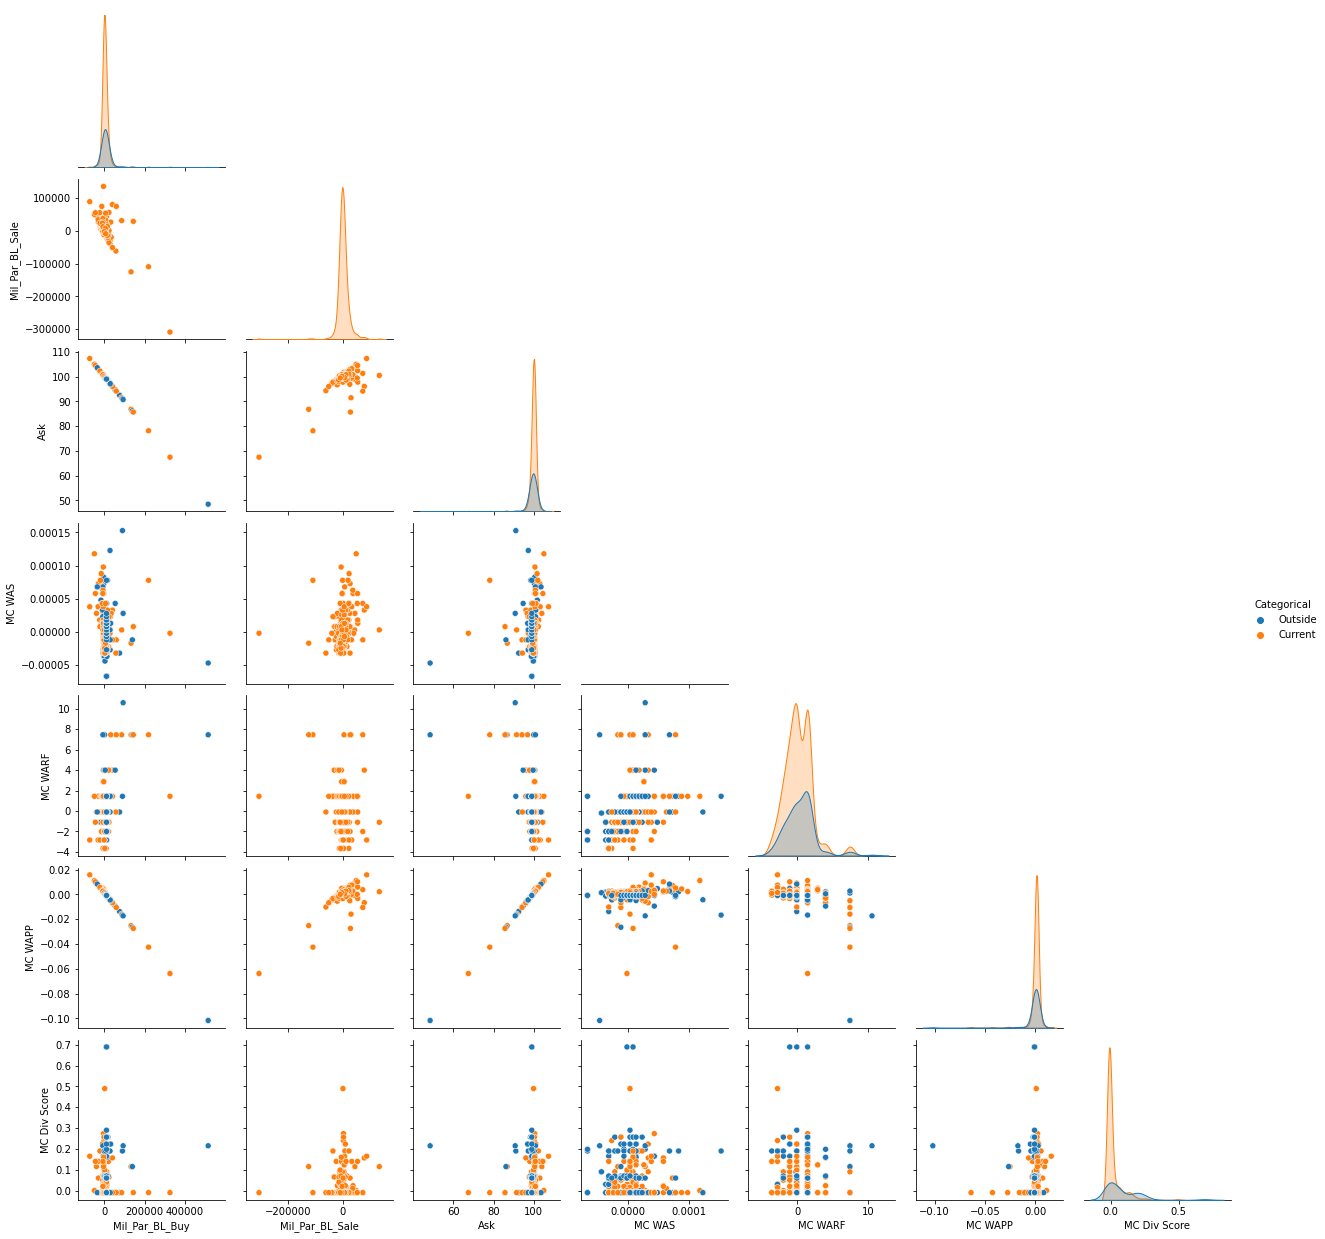

In [33]:
sns_plot = sns.pairplot(model_port[['Mil_Par_BL_Buy','Mil_Par_BL_Sale','Ask',
                                    'MC WAS','MC WARF','MC WAPP','MC Div Score','Categorical']], 
                        diag_kind="kde",corner = True,hue='Categorical')  #, diag_kind='kde'
fig = sns_plot.fig
fig.savefig(path + "CLO_Marginal_feature_PairPlot.png")

In [34]:
corr = model_port[['Spread','Mil_Par_BL_Buy','Mil_Par_BL_Sale','Ask',
                    'S&P Recovery Rate (AAA)','Adj. WARF NEW','Blended Price']].corr()
#pd.options.display.float_format = "{:,.2}".format
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

In [35]:
mcorr = model_port[['Mil_Par_BL_Buy','Mil_Par_BL_Sale','Ask',
                                    'MC WAS','MC WARF','MC WAPP','MC Div Score']].corr()
#pd.options.display.float_format = "{:,.2}".format
mcorr.style.background_gradient(cmap='coolwarm').set_precision(2)

# Screening

- goals = higher spread

types of queries?

- how do I raise my WAS by 5 bps and not burn more than 2mm in par

- how to I lower my WARF score without losing spread, or buring par, but willing to sacrifice other things?

- how can I raise my spread but not go above 3200 on WARF, or below 50 on diversity score?




In [46]:
# grab the current portfolio stats from above and create a splice where "spread"> current WAS

model_port[['Parent Company','Moodys Industry','Spread','Total_Par_Build_Loss','Adj. WARF NEW',
            'Par_no_default','Desirability']].sort_values(by='Spread',ascending=False)

Parent Company  \
LXID                                              
LX187441               Constellis Holdings, LLC   
LX169474               Research Now Group, Inc.   
LX192625           Dynacast (Form Technologies)   
LX181831                                MyEyeDr   
LX191924                     ICP Group Holdings   
...                                         ...   
USU6835WAA28              Organon Finance 1 LLC   
USC6900PAL34                  Restaurant Brands   
USU9094LAD02              United AirLines, Inc.   
USU93967AA23  Wash MultiFamily Acquisition Inc.   
USU97128AR05              WMG Acquisition Corp.   

                              Moodys Industry  Spread  Total_Par_Build_Loss  \
LXID                                                                          
LX187441                  Aerospace & Defense  0.1100                     0   
LX169474                   Services: Business  0.0950                     0   
LX192625                    Capital Equipment  0.0925                     0   
LX181831                        Retail Stores  0.0825                     0   
LX191924        Chemicals, Plastics, & Rubber  0.0775                     0   
...                                       ...     ...                   ...   
USU6835WAA28     Healthcare & Pharmaceuticals     NaN                     0   
USC6900PAL34        Beverage, Food, & Tobacco     NaN                     0   
USU9094LAD02         Transportation: Consumer     NaN                     0   
USU93967AA23               Services: Consumer     NaN                     0   
USU97128AR05  Media: Diversified & Production     NaN                     0   

              Adj. WARF NEW  Par_no_default  Desirability  
LXID                                                       
LX187441             3490.0            0.00      1.677378  
LX169474             2720.0            0.00      1.232015  
LX192625             3490.0       357971.95      0.916371  
LX181831             3490.0       250000.00      0.591651  
LX191924             3490.0       249000.00      0.461162  
...                     ...             ...           ...  
USU6835WAA28         1350.0            0.00      0.229418  
USC6900PAL34         1766.0            0.00      0.386438  
USU9094LAD02         1350.0            0.00      0.558027  
USU93967AA23         3490.0            0.00      0.005432  
USU97128AR05         1766.0            0.00      0.123601  

[488 rows x 7 columns]

## E.g. 1, How do I raise my WAS by 5 bps and not burn more than 2mm in Par?

In [71]:
model_port = model_port.drop(model_port[model_port['Issuer'].str.match('zz_LXREP')].index)

In [100]:
clo.Port_stats(model_port)


Portfolio Stats
Min Floating Spread Test - no Libor Floors             3.35%
Min Floating Spread Test - With Libor Floors           3.58%
Max Moodys Rating Factor Test (NEW WARF)                2772
Max Moodys Rating Factor Test (Orig WARF)               2944
Min Moodys Recovery Rate Test                          48.2%
Min S&P Recovery Rate Class A-1a                       41.7%
Moodys Diversity Test                                     87
WAP                                                   $99.01
Percent C                                               3.8%
Percent 2nd Lien                                        0.8%
Percent Sub80                                           0.0%
Percent Sub90                                           1.5%
Percent CovLite                                         9.4%
Total Portfolio Par (excl. Defaults)             499,303,478
Total Portfolio Par                              499,303,478
Current Portfolio                                499,303,478

In [104]:
# these work but are slightly slower
#float(pstats.loc['Min Floating Spread Test - no Libor Floors'].strip('%').to_numpy()[0])/100
#pstats.loc['Min Floating Spread Test - no Libor Floors'].str.strip('%').astype(float)[0]/100
#float(pstats.loc['Min Floating Spread Test - no Libor Floors','Portfolio Stats'].strip('%'))/100

# Most desired, i.e. list to buy
len(model_port.loc[(model_port['Categorical']=='Outside')&\
                               (model_port['Spread']>0.0335383475931462)&(model_port['Adj. WARF NEW']<3200),
                    ['Parent Company','Moodys Industry','Spread','Adj. WARF NEW',
            'Mil_Par_BL_Sale','Mil_Par_BL_Buy','MC Div Score','Desirability']].sort_values(by=['Desirability'],ascending=False))
model_port.loc[(model_port['Categorical']=='Outside')&\
                               (model_port['Spread']>0.0335383475931462)&(model_port['Adj. WARF NEW']<3200),
                    ['Mil_Par_BL_Buy']].sum()

12

Mil_Par_BL_Buy   -47250.0
dtype: float64

In [105]:
#model_port['Categorical']

# least desired, list to sell
len(model_port.loc[(model_port['Categorical']=='Current')&\
                               (model_port['Spread']<.035)&(model_port['Adj. WARF NEW']>3200),
                    ['Parent Company','Moodys Industry','Spread','Adj. WARF NEW',
            'Mil_Par_BL_Sale','Mil_Par_BL_Buy','MC Div Score','Desirability']].sort_values(by=['Desirability'])) #,ascending=False
model_port.loc[(model_port['Categorical']=='Current')&\
                               (model_port['Spread']<.035)&(model_port['Adj. WARF NEW']>3200),
                    ['Mil_Par_BL_Sale']].sum()

26

Mil_Par_BL_Sale   -968970.0
dtype: float64

In [ ]:
"""Spread	0.285714286
Adj. WARF NEW	0.317460317
MC Div Score	0.238095238
Moodys Recovery Rate	0
S&P Recovery Rate (AAA)	0.158730159
Blended Price	0"""


In [103]:
keyStats = ['Spread','Adj. WARF NEW','MC Div Score','Moodys Recovery Rate','S&P Recovery Rate (AAA)','Blended Price'] 
highLow = [1,-1,1,1,1,1]
weights = [0.285714286, 0.317460317, 0.238095238, 0, 0.158730159,0]
(np.array(weights)*np.array(highLow))
model_port = clo.desirability(model_port,keyStats,weights,highLow)

array([ 0.28571429, -0.31746032,  0.23809524,  0.        ,  0.15873016,
        0.        ])

In [107]:
model_port.info()

<class 'pandas.core.frame.DataFrame'>
Index: 462 entries, LX190245 to LX185219
Data columns (total 97 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Combined                                 462 non-null    object        
 1   Parent Company                           462 non-null    object        
 2   Issuer                                   462 non-null    object        
 3   Asset                                    462 non-null    object        
 4   Analyst                                  459 non-null    object        
 5   Spread                                   455 non-null    float64       
 6   Floor                                    447 non-null    float64       
 7   All In Rate                              462 non-null    float64       
 8   Maturity Date                            462 non-null    datetime64[ns]
 9   Mark Price                          

In [109]:
new = clo.raise_WAS(model_port,WAS_lift=0.0005,Parburn_crit=2e6)

#curr

len(new)


DF:  <class 'pandas.core.frame.DataFrame'>  WAS:  <class 'float'>  Parburn:  <class 'float'>
Pre Trade Stats, WAS:  0.0335383475931462  Target WAS:  0.0340383475931462  WARF:  2771.7540435027026  DivScore:  87.4933


340

In [114]:
new

['LX175827',
 'LX193380',
 'LX191328',
 'LX190422',
 'LX193944',
 'LX185949',
 'LX172001',
 'LX189365',
 'LX192164',
 'LX173270',
 'LX180276',
 'LX181046',
 'LX168956',
 'LX169002',
 'LX162009',
 'LX174852',
 'LX161695',
 'LX176335',
 'LX183042',
 'LX192319',
 'LX169521',
 'LX165158',
 'LX161296',
 'LX192222',
 'LX190069',
 'LX192672',
 'LX172008',
 'LX184502',
 'LX188215',
 'LX192678',
 'LX190953',
 'LX191415',
 'LX192293',
 'LX192294',
 'LX192386',
 'LX167796',
 'LX185324',
 'LX193604',
 'LX155666',
 'LX193607',
 'LX193330',
 'LX192780',
 'LX190026',
 'LX190972',
 'LX191084',
 'LX171510',
 'LX173606',
 'LX177019',
 'LX169049',
 'LX176839',
 'LX193821',
 'LX159354',
 'LX171003',
 'LX175350',
 'LX175374',
 'LX165183',
 'LX192971',
 'LX185399',
 'LX190093',
 'LX175317',
 'LX192094',
 'LX192343',
 'LX168784',
 'LX185309',
 'LX170204',
 'LX179355',
 'LX182073',
 'LX191933',
 'LX191935',
 'LX167679',
 'LX177794',
 'LX192894',
 'LX152766',
 'LX175452',
 'LX159695',
 'LX183544',
 'LX190926',

In [99]:
# this is just a check

model_port.loc['LX173270',['Par_no_default','PnD_postTrade']]
min(model_port.loc['LX173270','Par_no_default'],1e6)

model_port.loc['LX173270','PnD_postTrade'] = model_port.loc['LX173270','Par_no_default'] - \
                min(model_port.loc['LX173270','Par_no_default'],1e6)
model_port.loc['LX173270','PnD_postTrade']

Par_no_default    638270.74
PnD_postTrade     638270.74
Name: LX173270, dtype: object

638270.74

0.0

In [113]:
(model_port.loc[~model_port['Trade'].isna(),['Parent Company','Trade','Par_no_default',
                                             'PnD_postTrade','Spread','Adj. WARF NEW','S&P Recovery Rate (AAA)',
                                             'Desirability']]).sort_values(by=['Trade','Desirability'])
type((model_port.loc[~model_port['Trade'].isna(),['Parent Company','Trade','Par_no_default',
                                             'PnD_postTrade','Spread','Adj. WARF NEW','S&P Recovery Rate (AAA)',
                                             'Desirability']]).sort_values(by=['Trade','Desirability']))

Parent Company Trade  \
LXID                                                              
LX185280                   Acuren (Rockwood Service Corp)   Buy   
LX190451                                         Hyperion   Buy   
LX177119                                  Plaskolite, LLC   Buy   
LX190032                     Alliance Laundry Systems LLC   Buy   
LX185233                                          Froneri   Buy   
LX188807                                         UKG Inc.   Buy   
LX179819                                    Staples, Inc.   Buy   
LX171005                 Blackhawk Network Holdings, Inc.   Buy   
LX192681                                      Alter Domus   Buy   
LX190220       CHI Overhead Doors (C.H.I. Overhead Doors)   Buy   
LX169474                         Research Now Group, Inc.   Buy   
LX178613                             Belfor Holdings Inc.   Buy   
LX156377                       Team Health Holdings, Inc.  Sale   
LX171023                              Cineworld Group plc  Sale   
LX171560                             Pro Mach Group, Inc.  Sale   
LX172192                                    Husky (Titan)  Sale   
LX170802  Prometric Holdings Inc. (fka ETS Holdings Inc.)  Sale   
LX165390                   U.S. Anesthesia Partners, Inc.  Sale   
LX180415                        Diamond Sports Group, LLC  Sale   
LX185376                               Tank Holding Corp.  Sale   
LX173185                          Berlin Packaging L.L.C.  Sale   
LX176167                                Distributed Power  Sale   
LX184212                                   Telesat Canada  Sale   
LX173150                        Hub International Limited  Sale   

          Par_no_default       PnD_postTrade  Spread  Adj. WARF NEW  \
LXID                                                                  
LX185280             0.0        979,482.3757    0.04        2,720.0   
LX190451             0.0        940,733.3625  0.0375        2,720.0   
LX177119             0.0           978,861.7  0.0425        2,720.0   
LX190032             0.0        979,780.1787   0.035        2,720.0   
LX185233             0.0  643,812.6000000001  0.0575        2,220.0   
LX188807             0.0        949,504.9743  0.0675        2,720.0   
LX179819             0.0         984,187.017   0.045        2,220.0   
LX171005             0.0        982,467.4525    0.07        2,720.0   
LX192681             0.0        983,928.5148  0.0375        2,220.0   
LX190220             0.0        979,235.6886   0.035        2,720.0   
LX169474             0.0  595,878.0236249999   0.095        2,720.0   
LX178613             0.0        926,185.5832    0.04        2,220.0   
LX156377    1,284,857.76          284,857.76  0.0275        6,500.0   
LX171023      719,479.95                 0.0   0.025        6,500.0   
LX171560    1,963,323.02          963,323.02  0.0275        3,490.0   
LX172192    1,964,551.77          964,551.77    0.03        3,490.0   
LX170802     1,386,855.0           386,855.0    0.03        3,490.0   
LX165390    2,194,286.48        1,194,286.48    0.03        3,490.0   
LX180415     3,371,695.5         2,371,695.5  0.0325        3,490.0   
LX185376    1,635,888.87  635,888.8700000001  0.0325        3,490.0   
LX173185    1,960,934.92  960,934.9199999999    0.03        3,490.0   
LX176167    1,962,361.92  962,361.9199999999    0.03        3,490.0   
LX184212    1,824,160.98          824,160.98  0.0275        3,490.0   
LX173150    1,126,560.71 126,560.70999999996    0.03        3,490.0   

          S&P Recovery Rate (AAA)         Desirability  
LXID                                                    
LX185280                      0.3 -0.09540339641144062  
LX190451                     0.35 -0.09496763766859319  
LX177119                      0.4  0.07139843728663857  
LX190032                      0.4  0.11305687926070178  
LX185233                     0.02   0.1382512318503865  
LX188807                     0.02  0.20083092381090467

pandas.core.frame.DataFrame

In [110]:
pd.options.display.float_format = "{:,}".format
#round(model_port.loc[~model_port['Trade'].isna(),['Trade','Par_no_default','PnD_postTrade']],0)
(model_port.loc[~model_port['Trade'].isna(),['Parent Company','Trade','Par_no_default',
                                             'PnD_postTrade','Spread','Adj. WARF NEW','S&P Recovery Rate (AAA)',
                                             'Desirability']]).sort_values(by=['Trade','Desirability'])
model_port.loc[~model_port['Trade'].isna(),['Trade','Par_no_default','PnD_postTrade','Mil_Par_BL_Buy','Mil_Par_BL_Sale']].sum()
model_port.loc[model_port['Trade']=='Buy',['Trade','Par_no_default','PnD_postTrade','Mil_Par_BL_Buy','Mil_Par_BL_Sale']].sum()

Parent Company Trade  \
LXID                                                              
LX185280                   Acuren (Rockwood Service Corp)   Buy   
LX190451                                         Hyperion   Buy   
LX177119                                  Plaskolite, LLC   Buy   
LX190032                     Alliance Laundry Systems LLC   Buy   
LX185233                                          Froneri   Buy   
LX188807                                         UKG Inc.   Buy   
LX179819                                    Staples, Inc.   Buy   
LX171005                 Blackhawk Network Holdings, Inc.   Buy   
LX192681                                      Alter Domus   Buy   
LX190220       CHI Overhead Doors (C.H.I. Overhead Doors)   Buy   
LX169474                         Research Now Group, Inc.   Buy   
LX178613                             Belfor Holdings Inc.   Buy   
LX156377                       Team Health Holdings, Inc.  Sale   
LX171023                              Cineworld Group plc  Sale   
LX171560                             Pro Mach Group, Inc.  Sale   
LX172192                                    Husky (Titan)  Sale   
LX170802  Prometric Holdings Inc. (fka ETS Holdings Inc.)  Sale   
LX165390                   U.S. Anesthesia Partners, Inc.  Sale   
LX180415                        Diamond Sports Group, LLC  Sale   
LX185376                               Tank Holding Corp.  Sale   
LX173185                          Berlin Packaging L.L.C.  Sale   
LX176167                                Distributed Power  Sale   
LX184212                                   Telesat Canada  Sale   
LX173150                        Hub International Limited  Sale   

          Par_no_default       PnD_postTrade  Spread  Adj. WARF NEW  \
LXID                                                                  
LX185280             0.0        979,482.3757    0.04        2,720.0   
LX190451             0.0        940,733.3625  0.0375        2,720.0   
LX177119             0.0           978,861.7  0.0425        2,720.0   
LX190032             0.0        979,780.1787   0.035        2,720.0   
LX185233             0.0  643,812.6000000001  0.0575        2,220.0   
LX188807             0.0        949,504.9743  0.0675        2,720.0   
LX179819             0.0         984,187.017   0.045        2,220.0   
LX171005             0.0        982,467.4525    0.07        2,720.0   
LX192681             0.0        983,928.5148  0.0375        2,220.0   
LX190220             0.0        979,235.6886   0.035        2,720.0   
LX169474             0.0  595,878.0236249999   0.095        2,720.0   
LX178613             0.0        926,185.5832    0.04        2,220.0   
LX156377    1,284,857.76          284,857.76  0.0275        6,500.0   
LX171023      719,479.95                 0.0   0.025        6,500.0   
LX171560    1,963,323.02          963,323.02  0.0275        3,490.0   
LX172192    1,964,551.77          964,551.77    0.03        3,490.0   
LX170802     1,386,855.0           386,855.0    0.03        3,490.0   
LX165390    2,194,286.48        1,194,286.48    0.03        3,490.0   
LX180415     3,371,695.5         2,371,695.5  0.0325        3,490.0   
LX185376    1,635,888.87  635,888.8700000001  0.0325        3,490.0   
LX173185    1,960,934.92  960,934.9199999999    0.03        3,490.0   
LX176167    1,962,361.92  962,361.9199999999    0.03        3,490.0   
LX184212    1,824,160.98          824,160.98  0.0275        3,490.0   
LX173150    1,126,560.71 126,560.70999999996    0.03        3,490.0   

          S&P Recovery Rate (AAA)         Desirability  
LXID                                                    
LX185280                      0.3 -0.09540339641144062  
LX190451                     0.35 -0.09496763766859319  
LX177119                      0.4  0.07139843728663857  
LX190032                      0.4  0.11305687926070178  
LX185233                     0.02   0.1382512318503865  
LX188807                     0.02  0.20083092381090467

Trade              BuyBuyBuyBuySaleBuyBuySaleSaleSaleBuySaleSaleB...
Par_no_default                                         21,394,956.88
PnD_postTrade                                   20,599,534.400925003
Mil_Par_BL_Buy                                             593,690.0
Mil_Par_BL_Sale                                  -743,859.9999999999
dtype: object

Trade              BuyBuyBuyBuyBuyBuyBuyBuyBuyBuyBuyBuy
Par_no_default                                      0.0
PnD_postTrade                         10,924,057.470925
Mil_Par_BL_Buy                                -47,250.0
Mil_Par_BL_Sale                                     0.0
dtype: object

In [101]:
 19759068-18992603 #-41420.0

766465

In [112]:
clo.prepost_Port_stats(model_port,  ['Par_no_default','PnD_postTrade'])

Current Portfolio (pre-trade)  \
Min Floating Spread Test - no Libor Floors                           3.35%   
Min Floating Spread Test - With Libor Floors                         3.58%   
Max Moodys Rating Factor Test (NEW WARF)                              2772   
Max Moodys Rating Factor Test (Orig WARF)                             2944   
Min Moodys Recovery Rate Test                                        48.2%   
Min S&P Recovery Rate Class A-1a                                     41.7%   
Moodys Diversity Test                                                   85   
WAP                                                                 $99.01   
Percent C                                                             3.8%   
Percent 2nd Lien                                                      0.8%   
Percent Sub80                                                         0.0%   
Percent Sub90                                                         1.5%   
Percent CovLite                                                       9.4%   
Total Portfolio Par (excl. Defaults)                           499,303,478   
Total Portfolio Par                                            499,303,478   
Current Portfolio                                              499,303,478   

                                             Post-trade Portfolio  
Min Floating Spread Test - no Libor Floors                  3.40%  
Min Floating Spread Test - With Libor Floors                3.63%  
Max Moodys Rating Factor Test (NEW WARF)                     2740  
Max Moodys Rating Factor Test (Orig WARF)                    2895  
Min Moodys Recovery Rate Test                               47.9%  
Min S&P Recovery Rate Class A-1a                            41.6%  
Moodys Diversity Test                                          87  
WAP                                                        $96.88  
Percent C                                                    3.4%  
Percent 2nd Lien                                             1.5%  
Percent Sub80                                                2.2%  
Percent Sub90                                                3.5%  
Percent CovLite                                              9.4%  
Total Portfolio Par (excl. Defaults)                  498,508,056  
Total Portfolio Par                                   499,303,478  
Current Portfolio                                     499,303,478

In [104]:
model_port['PnD_postTrade'].sum()

498258105.8404

In [105]:
499303478-766464

498537014

## E.g. 2, How to I lower my WARF score without losing spread, or burning par, but willing to sacrifice other things?

In [117]:
#model_port.loc[(model_port['MC WARF']<0)&(model_port['Mil_Par_BL_Buy']>0)&(model_port['MC WAS']>0),
#               ['Spread','MC WAS','Total_Par_Build_Loss','Adj. WARF NEW',
#            'Parent Company','Moodys Industry','Mil_Par_BL_Buy']].sort_values(by='Spread',ascending=False)

model_port.loc[(model_port['Categorical']=='Current')&\
                            (model_port['MC WARF']>0)&(model_port['Mil_Par_BL_Sale']>=0)&(model_port['MC WAS']>0),\
                   ['Spread','MC WAS','Total_Par_Build_Loss','Adj. WARF NEW',\
            'Parent Company','Moodys Industry','Mil_Par_BL_Sale','Desirability']]\
                            .sort_values(by=['Desirability']) 
    # buys don't have to be outside!
model_port.loc[(model_port['Categorical']=='Outside')&\
                            (model_port['MC WARF']<0)&(model_port['Mil_Par_BL_Buy']>=0)&(model_port['MC WAS']>0),\
                   ['Spread','MC WAS','Total_Par_Build_Loss','Adj. WARF NEW',\
            'Parent Company','Moodys Industry','Mil_Par_BL_Buy','Desirability']]\
                            .sort_values(by=['Desirability'],ascending=False)


Spread                 MC WAS  Total_Par_Build_Loss  Adj. WARF NEW  \
LXID                                                                           
LX190689    0.04 1.2915465681398453e-05                     0        3,490.0   
LX190926  0.0425  1.791243273726456e-05                     0        3,490.0   
LX186124  0.0375  7.918498625532344e-06                     0        3,490.0   
LX184508    0.04 1.2915465681398453e-05                     0        3,490.0   
LX191189    0.04 1.2915465681398453e-05                     0        3,490.0   
LX191949    0.04 1.2915465681398453e-05                     0        3,490.0   
LX191328    0.05 3.2903333904869825e-05                     0        3,490.0   
LX183890   0.045  2.290939979313067e-05                     0        3,490.0   
LX175452  0.0425  1.791243273726456e-05                     0        3,490.0   
LX192320  0.0675  6.788210329593258e-05                     0        3,490.0   
LX191220   0.055  4.289726801660204e-05                     0        3,490.0   
LX193713   0.055  4.289726801660204e-05                     0        3,490.0   
LX191363    0.04 1.2915465681398453e-05                     0        3,490.0   
LX191924  0.0775  8.786997151940396e-05                     0        3,490.0   
LX191365    0.07  7.287907035179869e-05                     0        3,490.0   
LX188969  0.0625 5.7888169184200367e-05                     0        3,490.0   
LX189480  0.0625 5.7888169184200367e-05                     0        3,490.0   
LX192625  0.0925  0.0001178517738546006                     0        3,490.0   

                                Parent Company  \
LXID                                             
LX190689              ProAmpac PG Borrower LLC   
LX190926                  Charter NEX US, Inc.   
LX186124                         Duff & Phelps   
LX184508         WIRB Copernicus (WCG/DaVinci)   
LX191189                 Planview Parent, Inc.   
LX191949  Protective Industrial Products (PIP)   
LX191328                            Accentcare   
LX183890             eResearchTechnology, Inc.   
LX175452                                Cetera   
LX192320                           Idera, Inc.   
LX191220        US Radiology Specialists, Inc.   
LX193713                  One Call Corporation   
LX191363                     CommerceHub, Inc.   
LX191924                    ICP Group Holdings   
LX191365                     CommerceHub, Inc.   
LX188969                   MHS (Deliver Buyer)   
LX189480           Windstream Services II, LLC   
LX192625          Dynacast (Form Technologies)   

                                    Moodys Industry  Mil_Par_BL_Sale  \
LXID                                                                   
LX190689             Containers, Packaging, & Glass          2,010.0   
LX190926             Containers, Packaging, & Glass          3,210.0   
LX186124                         Services: Business          1,090.0   
LX184508               Healthcare & Pharmaceuticals          2,500.0   
LX191189                       High Tech Industries          1,250.0   
LX191949                          Capital Equipment            630.0   
LX191328               Healthcare & Pharmaceuticals          5,000.0   
LX183890               Healthcare & Pharmaceuticals          1,410.0   
LX175452  Banking, Finance, Insurance & Real Estate            830.0   
LX192320                       High Tech Industries              0.0   
LX191220               Healthcare & Pharmaceuticals          2,920.0   
LX193713               Healthcare & Pharmaceuticals          2,500.0   
LX191363                       High Tech Industries          3,130.0   
LX191924              Chemicals, Plastics, & Rubber          8,750.0   
LX191365                       High Tech Industries         22,500.0   
LX188969                          Capital Equipment          3,750.0   
LX189480                         Telecommunications          2,920.0   
LX192625                          Capita

Spread                 MC WAS  Total_Par_Build_Loss  Adj. WARF NEW  \
LXID                                                                           
LX169474   0.095 0.00012284874091046671                     0        2,720.0   
LX179819   0.045  2.290939979313067e-05                     0        2,220.0   
LX177119  0.0425  1.791243273726456e-05                     0        2,720.0   

                    Parent Company          Moodys Industry  Mil_Par_BL_Buy  \
LXID                                                                          
LX169474  Research Now Group, Inc.       Services: Business        27,500.0   
LX179819             Staples, Inc.       Services: Business         4,170.0   
LX177119           Plaskolite, LLC  Construction & Building        10,000.0   

                Desirability  
LXID                          
LX169474  0.8426896017444983  
LX179819  0.2296234081997848  
LX177119 0.07139843728663857

In [118]:
model_port.loc[(model_port['Categorical']=='Current')&\
            (model_port['MC WARF']>=0)&(model_port['Mil_Par_BL_Sale']>=0)&\
               (model_port['MC WAS']>=0),'Current Portfolio'].sum()
model_port.loc[(model_port['Categorical']=='Outside')&\
                (model_port['MC WARF']<=0)&(model_port['Mil_Par_BL_Buy']>=0)&\
               (model_port['MC WAS']>=0),'Current Portfolio'].sum()

18896894.25

0.0

In [125]:
model_port.columns.str.match('Trade').any()

True

In [166]:
# how about compare the sizes of the lists to get an idea which is the constraint
# monitor the trade balance and when it because more than a trade size either way
# do another offsetting trade

In [167]:
keyStats = ['Spread','Adj. WARF NEW','S&P Recovery Rate (AAA)','MC Div Score'] 
highLow = [1,-1,1,1]
weights = [0.4, 0.4, 0.1, 0.1]
(np.array(weights)*np.array(highLow))
model_port = desirability(model_port,keyStats,weights,highLow)

array([ 0.4, -0.4,  0.1,  0.1])

In [120]:
clo.lower_WARF(model_port,2600,Parburn_crit=0)

Pre Trade Stats, WARF:  2771.7540435027026  Target WARF:  2600  WAS:  0.0335383475931462  DivScore:  87.4933
# Sales:  18  $amt:  18896894.25  # Buys:  3  $amt:  3000000.0
Trade Set # 1
LX190689 2010.0
LX169474 29565.275
Trade Balance:  0.0
Sale:  LX190689  Buy:  LX169474
Post Stats, WAS:  0.033633399633007106  WARF:  2770.2089222011045  DivScore:  87.4933 Parburn:  29565.275
Trade Set # 2
LX190926 32775.275
LX179819 36958.6607
Trade Balance:  0.0
Sale:  LX190926  Buy:  LX179819
Post Stats, WAS:  0.03362214247734505  WARF:  2767.657420636317  DivScore:  87.4183 Parburn:  36958.6607
Trade Set # 3
LX186124 38048.6607
LX177119 48059.5607
Trade Balance:  95832.5
Trying to sell more  LX190689  Sells # 0
Sale:  LX186124  Buy:  LX177119
Post Stats, WAS:  0.03363314763645341  WARF:  2766.114361325329  DivScore:  87.39330000000001 Parburn:  48059.5607


Combined  \
LXID                                                          
LX190245  CNT Holdings I Corp - Initial Term Loan (Secon...   
LX190219  CNT Holdings I Corp - Initial Term Loan (First...   
LX175827  8th Avenue Food & Provisions, Inc. - Term Loan...   
LX193380             AAdvantage Loyalty IP Ltd. - Term Loan   
LX191328  Pluto Acquisition I, Inc. (aka AccentCare, Inc...   
...                                                     ...   
LX193419  BW Gas & Convenience Holdings, LLC - Initial T...   
LX185593  Zayo Group Holdings, Inc. - Initial Dollar Ter...   
LX192354  Zelis Cost Management Buyer, Inc. - Term B-1 Loan   
LX167827  Acuity Specialty Products, Inc. (aka Zep Inc.)...   
LX185219  Ziggo Financing Partnership - Term Loan I Faci...   

                              Parent Company  \
LXID                                           
LX190245                      1-800 Contacts   
LX190219                      1-800 Contacts   
LX175827  8th Avenue Food & Provisions, Inc.   
LX193380          AAdvantage Loyalty IP Ltd.   
LX191328                          Accentcare   
...                                      ...   
LX193419                              Yesway   
LX185593           Zayo Group Holdings, Inc.   
LX192354   Zelis Cost Management Buyer, Inc.   
LX167827                                 Zep   
LX185219                               Ziggo   

                                                    Issuer  \
LXID                                                         
LX190245                               CNT Holdings I Corp   
LX190219                               CNT Holdings I Corp   
LX175827                8th Avenue Food & Provisions, Inc.   
LX193380                        AAdvantage Loyalty IP Ltd.   
LX191328  Pluto Acquisition I, Inc. (aka AccentCare, Inc.)   
...                                                    ...   
LX193419                BW Gas & Convenience Holdings, LLC   
LX185593                         Zayo Group Holdings, Inc.   
LX192354                 Zelis Cost Management Buyer, Inc.   
LX167827    Acuity Specialty Products, Inc. (aka Zep Inc.)   
LX185219                       Ziggo Financing Partnership   

                                            Asset            Analyst  Spread  \
LXID                                                                           
LX190245          Initial Term Loan (Second Lien)     Adey Delbridge  0.0675   
LX190219           Initial Term Loan (First Lien)     Adey Delbridge  0.0375   
LX175827                   Term Loan (First Lien)        Rekha Nayar   0.035   
LX193380                                Term Loan                NaN  0.0475   
LX191328  2020 Incremental Term Loan (First Lien)     Adey Delbridge    0.05   
...                                           ...                ...     ...   
LX193419                        Initial Term Loan        Rekha Nayar   0.035   
LX185593                 Initial Dollar Term Loan    Andrew Scheffer    0.03   
LX192354                            Term B-1 Loan        Sooji  Park   0.035   
LX167827           Initial Term Loan (First Lien)  Bala Ramakrishnan    0.04   
LX185219                     Term Loan I Facility    Rosalind Dalton   0.025   

          Floor          All In Rate Maturity Date  Mark Price  ...  \
LXID                                                            ...   
LX190245 0.0075  0.07500000000000001    2028-11-06       101.0  ...   
LX190219 0.0075                0.045    2027-11-08      99.792  ...   
LX175827    0.0  0.03723380000000001    2025-10-01      99.896  ...   
LX193380    NaN              0.04974    2028-03-10        99.0  ...   
LX191328  0.005  0.05500000000000001    2026-06-22       100.0  ...   
...         ...                  ...           ...         ...  ...   
LX193419  0.005                 0.04    2028-03-31      100.25  ...   
LX185593    0.0            0.0321775    2027-03-09      99.174  ...   
LX192354    0.0 0.037152500000000005    2026-09-

In [171]:
#model_port[["Desirability",'Spread','Adj. WARF NEW']]
pd.options.display.float_format = "{:,}".format
(model_port.loc[~model_port['Trade'].isna(),['Parent Company','Trade','Par_no_default',
                                             'PnD_postTrade','Spread','Adj. WARF NEW','S&P Recovery Rate (AAA)',
                                             'Desirability']]).sort_values(by=['Trade','Desirability'])
(model_port.loc[~model_port['Trade'].isna(),['Parent Company','Trade','Par_no_default','PnD_postTrade','Spread','Adj. WARF NEW','S&P Recovery Rate (AAA)','MC Div Score']]).sum()

Parent Company Trade  Par_no_default  PnD_postTrade  \
LXID                                                                           
LX177119                Plaskolite, LLC   Buy             0.0    1,012,525.0   
LX179819                  Staples, Inc.   Buy             0.0 1,006,188.3817   
LX169474       Research Now Group, Inc.   Buy             0.0  1,028,619.975   
LX186124                  Duff & Phelps  Sale       904,167.5            0.0   
LX190689       ProAmpac PG Borrower LLC  Sale    2,469,309.48     965,999.48   
LX184508  WIRB Copernicus (WCG/DaVinci)  Sale       592,522.5            0.0   

          Spread  Adj. WARF NEW  S&P Recovery Rate (AAA)         Desirability  
LXID                                                                           
LX177119  0.0425        2,720.0                      0.4  0.22469296425345467  
LX179819   0.045        2,220.0                     0.35   0.4669197370453343  
LX169474   0.095        2,720.0                     0.05   1.6049708010384662  
LX186124  0.0375        3,490.0                      0.4 -0.23804061099413104  
LX190689    0.04        3,490.0                      0.3 -0.23084625221156743  
LX184508    0.04        3,490.0                      0.4 -0.16060646350578586

Parent Company             Duff & PhelpsPlaskolite, LLCProAmpac PG Borrow...
Trade                                                  SaleBuySaleBuyBuySale
Par_no_default                                                  3,965,999.48
PnD_postTrade                                                 4,013,332.8367
Spread                                                                   0.3
Adj. WARF NEW                                                       18,130.0
S&P Recovery Rate (AAA)                                                  1.9
MC Div Score                                           -0.060000000000030695
dtype: object

In [121]:
# probably need to zero out the trade list before running a new query!
clo.prepost_Port_stats(model_port, ['Par_no_default','PnD_postTrade'])

Current Portfolio (pre-trade)  \
Min Floating Spread Test - no Libor Floors                           3.35%   
Min Floating Spread Test - With Libor Floors                         3.58%   
Max Moodys Rating Factor Test (NEW WARF)                              2772   
Max Moodys Rating Factor Test (Orig WARF)                             2944   
Min Moodys Recovery Rate Test                                        48.2%   
Min S&P Recovery Rate Class A-1a                                     41.7%   
Moodys Diversity Test                                                   85   
WAP                                                                 $99.01   
Percent C                                                             3.8%   
Percent 2nd Lien                                                      0.8%   
Percent Sub80                                                         0.0%   
Percent Sub90                                                         1.5%   
Percent CovLite                                                       9.4%   
Total Portfolio Par (excl. Defaults)                           499,303,478   
Total Portfolio Par                                            499,303,478   
Current Portfolio                                              499,303,478   

                                             Post-trade Portfolio  
Min Floating Spread Test - no Libor Floors                  3.37%  
Min Floating Spread Test - With Libor Floors                3.59%  
Max Moodys Rating Factor Test (NEW WARF)                     2766  
Max Moodys Rating Factor Test (Orig WARF)                    2939  
Min Moodys Recovery Rate Test                               48.1%  
Min S&P Recovery Rate Class A-1a                            41.7%  
Moodys Diversity Test                                          87  
WAP                                                        $98.41  
Percent C                                                    3.8%  
Percent 2nd Lien                                             1.0%  
Percent Sub80                                                0.6%  
Percent Sub90                                                2.1%  
Percent CovLite                                              9.6%  
Total Portfolio Par (excl. Defaults)                  499,351,538  
Total Portfolio Par                                   499,303,478  
Current Portfolio                                     499,303,478

## E.g. 3, How can I raise my spread but not go above 3200 on WARF, or below 50 on diversity score?

In [63]:
model_port.loc[(model_port['MC WAS']>0)&(model_port['Adj. WARF NEW']<3400)&(model_port['MC Div Score']>0),
               ['Spread','MC WAS','Total_Par_Build_Loss','Adj. WARF NEW',
            'Parent Company','Moodys Industry','Mil_Par_BL_Buy']].sort_values(by='Spread',ascending=False)

Spread                 MC WAS  Total_Par_Build_Loss  Adj. WARF NEW  \
LXID                                                                           
LX191236   0.065  6.288513624033015e-05                     0        2,720.0   
LX190612  0.0625  5.788816918476242e-05                     0        2,220.0   
LX188714  0.0525  3.790030096249147e-05                     0        1,350.0   
LX188905  0.0525  3.790030096249147e-05                     0        1,350.0   
LX192269    0.05  3.290333390692374e-05                     0        2,720.0   
LX193380  0.0475    2.7906366851356e-05                     0        2,720.0   
LX193607   0.045 2.2909399795795204e-05                     0        2,720.0   
LX190112    0.04 1.2915465684659733e-05                     0        2,720.0   
LX193256    0.04 1.2915465684659733e-05                     0        2,720.0   
LX192466    0.04 1.2915465684659733e-05                     0        2,720.0   
LX127674    0.04 1.2915465684659733e-05                     0        2,720.0   
LX178613    0.04 1.2915465684659733e-05                     0        2,220.0   
LX193758  0.0375  7.918498629085058e-06                     0        2,220.0   
LX194289  0.0375  7.918498629091997e-06                     0        1,350.0   
LX192681  0.0375  7.918498629091997e-06                     0        2,220.0   
LX192365  0.0375  7.918498629091997e-06                     0        2,720.0   
LX193482  0.0375  7.918498629091997e-06                     0        2,720.0   
LXREP12   0.0375  7.918498629091997e-06                     0        2,220.0   
LX190069   0.035  2.921531573524261e-06                     0        2,720.0   
LX193944   0.035  2.921531573524261e-06                     0        2,720.0   
LX190472   0.035  2.921531573524261e-06                     0        2,720.0   
LX190953   0.035  2.921531573524261e-06                     0        2,220.0   
LX190032   0.035  2.921531573524261e-06                     0        2,720.0   
LX176260   0.035  2.921531573524261e-06                     0        2,220.0   
LX193776   0.035  2.921531573524261e-06                     0        1,350.0   
LX190220   0.035  2.921531573524261e-06                     0        2,720.0   
LX193419   0.035  2.921531573524261e-06                     0        2,220.0   
LXREP10    0.035  2.921531573524261e-06                     0        2,720.0   
LXREP11    0.035  2.921531573524261e-06                     0        2,720.0   

                                             Parent Company  \
LXID                                                          
LX191236                                           Syncapay   
LX190612                       MSG National Properties, LLC   
LX188714                        JetBlue Airways Corporation   
LX188905                              United AirLines, Inc.   
LX192269                   Lew's Intermediate Holdings, LLC   
LX193380                         AAdvantage Loyalty IP Ltd.   
LX193607      Autokiniton US Holdings, Inc. (aka L&W, Inc.)   
LX190112                               White Cap Buyer, LLC   
LX193256                               Vertex Aerospace LLC   
LX192466                                ION Analytics, Inc.   
LX127674     TNS, Inc. (Transaction Network Services, Inc.)   
LX178613                               Belfor Holdings Inc.   
LX193758      Liberty Cablevision of Puerto Rico (aka LCPR)   
LX194289                              United AirLines, Inc.   
LX192681                                        Alter Domus   
LX192365                                           PetSmart   
LX193482                                      IFS (aka IGT)   
LXREP12                                             LXREP12   
LX190069               American Residential Services L.L.C.   
LX193944                                      Adient US LLC   
LX190472                            Les Schwab Tire Centers   
LX190953                                 Astoria Energy LLC   
LX190032         

In [257]:
def raise_WAS(model_df,WAS_lift=0.0005,Parburn_crit=2e6):
  
    trade_size = 1e6  # can pass later or make dynamic
    
    model_df.drop(columns='Trade',inplace=True)  # need to clear any previous queries

    ####### Starting Key Stats ####################
    # Let's keep track of pre-trade key stats to compare
    # These should match the pstats from 'Current Portfolio'
    pre_WAS = weighted_average(model_df,cols=['Par_no_default','Spread'])
    target_WAS = pre_WAS + WAS_lift
    pre_WARF = weighted_average(model_df,cols=['Par_no_default','Adj. WARF NEW'])
    pre_dScore = diversity_score(model_df,ind_avg_eu,'Par_no_default')
    print('Pre Trade Stats, WAS: ',pre_WAS,' Target WAS: ',target_WAS,' WARF: ', pre_WARF,' DivScore: ', pre_dScore)

    ####### Potential Trade list ####################
    # technically we just want to rank by highest WAS/lowest parburn  (value/weight)
    sell_screen = (model_df['Categorical']=='Current')&\
                            (model_df['Spread']<pre_WAS)&(model_df['Adj. WARF NEW']>3200)
    buy_screen = (model_df['Categorical']=='Outside')&\
                            (model_df['Spread']>pre_WAS)&(model_df['Adj. WARF NEW']<3200)

    pot_sales = model_df.loc[sell_screen]\
                            .sort_values(by=['Desirability']).index.tolist() 
    # buys don't have to be outside!
    pot_buys = model_df.loc[buy_screen]\
                            .sort_values(by=['Desirability'],ascending=False).index.tolist()
    num_sales = len(pot_sales)
    num_buys = len(pot_buys)
    sales_value = model_df.loc[sell_screen,'Current Portfolio'].sum()
    buys_value = num_buys*trade_size

    ####### Initial Conditions ####################
    curr_port = model_df.loc[(model_df['Categorical']=='Current')].index.tolist()
    new_port = curr_port.copy()  # start with the current portfolio
    parburn = 0 
    trades = 0
    model_df['PnD_postTrade'] = model_df['Par_no_default']   # starts over, key if doing a second query
    
    trade_bal = 0


    for trades in range(min(len(pot_sales),len(pot_buys))):
    
        #let's start with one sale, one buy for now
        # need to actually calculate the burn for actual trade size
        sell_size = min(model_df.loc[pot_sales[trades],'Par_no_default'],trade_size)
        buy_size = trade_size
        
        #use this to track how far off cash neutral we are
        trade_bal += buy_size - sell_size
        
        parburn_sale = model_df.loc[pot_sales[trades],'Mil_Par_BL_Sale']
        if parburn_sale > 0:
            buy_size += parburn_sale
        elif parburn_sale < 0:
            buy_size += parburn_sale

        parburn_buy = model_df.loc[pot_buys[trades],'Mil_Par_BL_Buy']*buy_size/trade_size
        if parburn_buy > 0:
            buy_size += parburn_buy
        elif parburn_buy < 0:
            buy_size += parburn_buy
       
        
        parburn_trades = parburn_sale + parburn_buy
        print("Trade Set #",trades+1)
        parburn += parburn_sale
        print(pot_sales[trades],parburn)
        # can't use this because the sales isn't sized the same, need to calc actual parburn
        parburn += parburn_buy
        print(pot_buys[trades],parburn)
        
        

        sells = buys = 0
        
        if (parburn <= -Parburn_crit):
            print(parburn, post_WAS)
            break
        else:
            # need to make cash neutral trades
            # could instead keep a running sum of trades and match buys at the end
            model_df.loc[pot_sales[trades],'PnD_postTrade'] = \
                model_df.loc[pot_sales[trades],'Par_no_default'] - sell_size 
            model_df.loc[pot_buys[trades],'PnD_postTrade'] = \
                model_df.loc[pot_buys[trades],'Par_no_default'] + buy_size  #match the sell amount
            
            model_df.loc[pot_sales[trades],'Trade'] = 'Sale'
            new_port.remove(pot_sales[trades])   
            model_df.loc[pot_buys[trades],'Trade'] = 'Buy'
            new_port.append(pot_buys[trades])   
                                    
            #  THIS IS NEW AND UNTESTED
            #  a new counter each time this is triggered that starts at
            #  the beginning of the list (0)
            print(trade_bal, ' Breached threshold: ', abs(trade_bal) >= trade_size)
            if (abs(trade_bal) >= trade_size)&(trade_bal<0):
                # do an extra buy trade to balance it closer
                # can test to make sure liquid enough, if not go to next
                model_df.loc[pot_buys[buys],'PnD_postTrade'] += buy_size
                trade_bal += buy_size
                buys += 1
                #    model_df.loc[pot_buys[buys],'Par_no_default'] + buy_size  #match the sell amount
                #model_df.loc[pot_buys[buys],'Trade'] = 'Buy'
                #new_port.append(pot_buys[buys])
            elif (trade_bal >= trade_size)&(trade_bal>0):
                # do an extra sale trade to balance it close
                # can test to make sure liquid enough, if not go to next
                # need to check whether we can do another sale of previous, often not
                print('Trying to sell more ',pot_sales[sells], ' Sells #',sells)
                while (model_df.loc[pot_sales[sells],'PnD_postTrade'] <1)&(sells <= len(pot_sales)-1):
                    sells +=1
                model_df.loc[pot_sales[sells],'PnD_postTrade'] -= \
                    min(sell_size,model_df.loc[pot_sales[sells],'PnD_postTrade'])
                trade_bal -= min(sell_size,model_df.loc[pot_sales[sells],'PnD_postTrade'])
                sells += 1
                #    model_df.loc[pot_sales[trades],'Par_no_default'] - sell_size 
                #model_df.loc[pot_sales[trades],'Trade'] = 'Sale'
                #new_port.remove(pot_sales[trades])  
            #print(trade_bal)
            
            # on the last trade we need to balance out the trade_bal
            if (trades == min(len(pot_sales),len(pot_buys)) -1) & (trade_bal < 0):
                model_df.loc[pot_buys[buys],'PnD_postTrade'] += trade_bal
                trade_bal += trade_bal
                buys += 1
            elif (trades == min(len(pot_sales),len(pot_buys)) -1) & (trade_bal > 0):
                print('Trying to sell more ',pot_sales[sells], ' Sells #',sells)
                while (model_df.loc[pot_sales[sells],'PnD_postTrade'] <1)&(sells <= len(pot_sales)-1):
                    sells +=1
                model_df.loc[pot_sales[sells],'PnD_postTrade'] -= \
                    min(trade_bal,model_df.loc[pot_sales[sells],'PnD_postTrade'])
                trade_bal -= min(trade_bal,model_df.loc[pot_sales[sells],'PnD_postTrade'])
                sells += 1

            
            post_WAS = weighted_average(model_df.loc[new_port],cols=['PnD_postTrade','Spread'])
            post_dScore = diversity_score(model_df,ind_avg_eu,'PnD_postTrade')
            post_WARF = weighted_average(model_df,cols=['PnD_postTrade','Adj. WARF NEW'])
            
            print('Sale: ',pot_sales[trades],' Buy: ', pot_buys[trades])
            print('Post Stats, WAS: ',post_WAS,' WARF: ', post_WARF,' DivScore: ', post_dScore)
            trades += 1
            
            if (post_WAS >= target_WAS)|(post_dScore <= 50):
                print('Target met: ',(post_WAS >= target_WAS),' or Diversity breached: ', (post_dScore <= 50))
                print('Total Par Burn: ',parburn,'', post_WAS, post_dScore)
                break
            
        
    return new_port, curr_port #, sales, buys



In [258]:
keyStats = ['Spread','Adj. WARF NEW','S&P Recovery Rate (AAA)','MC Div Score'] 
highLow = [1,-1,1,1]
weights = [0.4, 0.25, 0.25, 0.1]
(np.array(weights)*np.array(highLow))
model_port = desirability(model_port,keyStats,weights,highLow)

array([ 0.4 , -0.25,  0.25,  0.1 ])

In [259]:
new, curr = raise_WAS(model_port,WAS_lift=0.0005,Parburn_crit=2e6)

len(new)
len(curr)

Pre Trade Stats, WAS:  0.0335383475931462  Target WAS:  0.0340383475931462  WARF:  2771.7540435027026  DivScore:  87.4933
Trade Set # 1
LX171023 -139550.0
LX169474 -115887.625
280520.05000000005  Breached threshold:  False
Sale:  LX171023  Buy:  LX169474
Post Stats, WAS:  0.03365944076417615  WARF:  2766.2919238097497  DivScore:  87.3683
Trade Set # 2
LX156377 -184167.625
LX178613 -189702.0418
280520.05000000005  Breached threshold:  False
Sale:  LX156377  Buy:  LX178613
Post Stats, WAS:  0.03368706304247114  WARF:  2757.802287844971  DivScore:  87.5683
Trade Set # 3
LX171560 -204922.0418
LX171005 -208201.3592
280520.05000000005  Breached threshold:  False
Sale:  LX171560  Buy:  LX171005
Post Stats, WAS:  0.0337829990519075  WARF:  2756.261763278489  DivScore:  87.5283
Trade Set # 4
LX172192 -228101.3592
LX179819 -224014.3422
280520.05000000005  Breached threshold:  False
Sale:  LX172192  Buy:  LX179819
Post Stats, WAS:  0.03382015408821621  WARF:  2753.7354893643815  DivScore:  87.498

False

340

340

In [260]:
pd.options.display.float_format = "{:,}".format
#round(model_port.loc[~model_port['Trade'].isna(),['Trade','Par_no_default','PnD_postTrade']],0)
(model_port.loc[~model_port['Trade'].isna(),['Parent Company','Trade','Par_no_default','PnD_postTrade','Spread','Adj. WARF NEW','S&P Recovery Rate (AAA)','MC Div Score']])
model_port.loc[~model_port['Trade'].isna(),['Trade','Par_no_default','PnD_postTrade']].sum()

Parent Company Trade  \
LXID                                                              
LX190032                     Alliance Laundry Systems LLC   Buy   
LX192681                                      Alter Domus   Buy   
LX178613                             Belfor Holdings Inc.   Buy   
LX173185                          Berlin Packaging L.L.C.  Sale   
LX171005                 Blackhawk Network Holdings, Inc.   Buy   
LX190220       CHI Overhead Doors (C.H.I. Overhead Doors)   Buy   
LX171023                              Cineworld Group plc  Sale   
LX180415                        Diamond Sports Group, LLC  Sale   
LX176167                                Distributed Power  Sale   
LX185233                                          Froneri   Buy   
LX173150                        Hub International Limited  Sale   
LX172192                                    Husky (Titan)  Sale   
LX190451                                         Hyperion   Buy   
LX177119                                  Plaskolite, LLC   Buy   
LX171560                             Pro Mach Group, Inc.  Sale   
LX170802  Prometric Holdings Inc. (fka ETS Holdings Inc.)  Sale   
LX169474                         Research Now Group, Inc.   Buy   
LX179819                                    Staples, Inc.   Buy   
LX185376                               Tank Holding Corp.  Sale   
LX156377                       Team Health Holdings, Inc.  Sale   
LX165390                   U.S. Anesthesia Partners, Inc.  Sale   
LX188807                                         UKG Inc.   Buy   

          Par_no_default       PnD_postTrade  Spread  Adj. WARF NEW  \
LXID                                                                  
LX190032             0.0        979,780.1787   0.035        2,720.0   
LX192681             0.0        984,825.8868  0.0375        2,220.0   
LX178613             0.0        926,185.5832    0.04        2,220.0   
LX173185    1,960,934.92  960,934.9199999999    0.03        3,490.0   
LX171005             0.0        981,500.6826    0.07        2,720.0   
LX190220             0.0        981,254.2597   0.035        2,720.0   
LX171023      719,479.95                 0.0   0.025        6,500.0   
LX180415     3,371,695.5         2,371,695.5  0.0325        3,490.0   
LX176167    1,962,361.92  962,361.9199999999    0.03        3,490.0   
LX185233             0.0         967,556.175  0.0575        2,220.0   
LX173150    1,126,560.71 126,560.70999999996    0.03        3,490.0   
LX172192    1,964,551.77          964,551.77    0.03        3,490.0   
LX190451             0.0        963,519.7389  0.0375        2,720.0   
LX177119             0.0  661,832.8000000002  0.0425        2,720.0   
LX171560    1,963,323.02          963,323.02  0.0275        3,490.0   
LX170802     1,386,855.0           386,855.0    0.03        3,490.0   
LX169474             0.0         884,112.375   0.095        2,720.0   
LX179819             0.0         984,187.017   0.045        2,220.0   
LX185376    1,635,888.87  635,888.8700000001  0.0325        3,490.0   
LX156377    1,284,857.76          284,857.76  0.0275        6,500.0   
LX165390    2,194,286.48        1,194,286.48    0.03        3,490.0   
LX188807             0.0        950,430.5775  0.0675        2,720.0   

          S&P Recovery Rate (AAA)          MC Div Score  
LXID                                                     
LX190032                      0.4   0.05999999999998806  
LX192681                      0.4   0.05999999999998806  
LX178613                     0.35   0.22339999999999804  
LX173185                     0.35 -0.010000000000005116  
LX171005                    0.035 -0.010000000000005116  
LX190220                      0.4   0.22339999999999804  
LX171023                     0.27   0.11499999999999488  
LX180415                      0.3 -0.010000000000005116  
LX176167                     0.35 -0.010000000000005116  
LX185233                     0.02 -0.010000000000005116  
LX173150                      0.3

Trade             BuyBuyBuySaleBuyBuySaleSaleSaleBuySaleSaleBuyB...
Par_no_default                                 19,570,795.900000002
PnD_postTrade                                  19,116,501.224400003
dtype: object

In [261]:
clo.prepost_Port_stats(model_port, ind_avg_eu, ['Par_no_default','PnD_postTrade'])

Current Portfolio (pre-trade)  \
Min Floating Spread Test - no Libor Floors                           3.35%   
Min Floating Spread Test - With Libor Floors                         3.58%   
Max Moodys Rating Factor Test (NEW WARF)                              2772   
Max Moodys Rating Factor Test (Orig WARF)                             2944   
Min Moodys Recovery Rate Test                                        48.2%   
Min S&P Recovery Rate Class A-1a                                     41.7%   
Moodys Diversity Test                                                   85   
WAP                                                                 $99.01   
Percent C                                                             3.8%   
Percent 2nd Lien                                                      0.8%   
Percent Sub80                                                         0.0%   
Percent Sub90                                                         1.5%   
Percent CovLite                                                       9.4%   
Total Portfolio Par (excl. Defaults)                           499,303,478   
Total Portfolio Par                                            499,303,478   
Current Portfolio                                              499,303,478   

                                             Post-trade Portfolio  
Min Floating Spread Test - no Libor Floors                  3.40%  
Min Floating Spread Test - With Libor Floors                3.63%  
Max Moodys Rating Factor Test (NEW WARF)                     2741  
Max Moodys Rating Factor Test (Orig WARF)                    2899  
Min Moodys Recovery Rate Test                               47.9%  
Min S&P Recovery Rate Class A-1a                            41.6%  
Moodys Diversity Test                                          88  
WAP                                                        $97.02  
Percent C                                                    3.4%  
Percent 2nd Lien                                             1.6%  
Percent Sub80                                                2.1%  
Percent Sub90                                                3.4%  
Percent CovLite                                              9.4%  
Total Portfolio Par (excl. Defaults)                  498,849,184  
Total Portfolio Par                                   499,303,478  
Current Portfolio                                     499,303,478

In [71]:
499303478 + 699229

500002707

## E.g. 4, How about potential Sells

In [40]:

model_port.loc[(model_port['MC WAS']<0)&(model_port['Mil_Par_BL_Sale']>0),
               ['Parent Company','Moodys Industry','Spread','MC WAS','Adj. WARF NEW',
            'Mil_Par_BL_Sale','Mil_Par_BL_Buy','MC Div Score']].sort_values(by=['Moodys Industry','Spread'],ascending=False)

Parent Company  \
LXID                                                          
LX181464                             Genesee & Wyoming Inc.   
LX185593                          Zayo Group Holdings, Inc.   
LX192038                              Iridium Satellite LLC   
LX189365                                     Alight (Tempo)   
LX183287                ProQuest LLC (fka ProQuest-CSA LLC)   
LX190422                                       Adevinta ASA   
LX190007          Clarivate (aka Camelot U.S. Acquisition)    
LX170802    Prometric Holdings Inc. (fka ETS Holdings Inc.)   
LX193556                                           WEX Inc.   
LX190914                                     Inspire Brands   
LX167282                                Eyemart Express LLC   
LX165475            Sally Holdings LLC (Sally Capital Inc.)   
LX192059                               Murphy Oil USA, Inc.   
LX168956            ALTICE FINANCING (Altice International)   
LX162009  Altice France S.A. (Ypso France SAS) (aka Nume...   
LX181024                   Nexstar Broadcasting Group, Inc.   
LX161695             ALTICE US (CABLEVISION / CSC Holdings)   
LX192538                   Springer Nature Deutschland GmbH   
LX191415             Asurion, LLC (fka Asurion Corporation)   
LX192293             Asurion, LLC (fka Asurion Corporation)   
LX192066                                           UKG Inc.   
LX163339                                        Micro Focus   
LX162911                                        Micro Focus   
LX193330                                Avast Software B.V.   
LX173721                   Ortho-Clinical Diagnostics, Inc.   
LX193825                                      Organon & Co.   
LX191337                   PointClickCare Technologies Inc.   
LX167279                  Parexel International Corporation   
LX156377                         Team Health Holdings, Inc.   
LX159695  Change Healthcare Holdings, Inc. (fka Emdeon I...   
LX191880                                          PPD, Inc.   
LX191503                             GFL Environmental Inc.   
LX193398                WIN Waste Innovations Holdings Inc.   
LX174279                                            Novolex   
LX173185                            Berlin Packaging L.L.C.   
LX171798                  Mavis Tire Express Services Corp.   
LX190374                         Weber-Stephen Products LLC   
LX193695                  Cornerstone Building Brands, Inc.   
LX191268                                    Gemini HDPE LLC   
LX188877                                     PQ Corporation   
LX192042                       INEOS Styrolution Group GmbH   
LX176002                             Messer Industries GmbH   
LX172192                                      Husky (Titan)   
LX171560                               Pro Mach Group, Inc.   
LX185558                    Ingersoll Rand (Gardner Denver)   
LX171721                     Flora Foods (aka Sigma Holdco)   
LX185230                                            Froneri   
LX184502                             Aramark Services, Inc.   
LX173270                 Alliant Holdings Intermediate, LLC   
LX169555                       Mitchell International, Inc.   
LX167989             USI, Inc. (fka Compass Investors Inc.)   
LX190972                     Avolon TLB Borrower 1 (US) LLC   
LX189108                          Ryan Specialty Group, LLC   
LX193821  Belron Finance US LLC (Belron Luxembourg S.a r...   
LX161296                American Axle & Manufacturing, Inc.   
LX185459                                     TransDigm Inc.   

                                    Moodys Industry  Spread    MC WAS  \
LXID                                                                    
LX181464                      Transportation: Cargo  0.0200 -0.000027   
LX185593                         Telecommunications  0.0300 -0.000007   
LX192038                         Telecommunications  0.0275 -0.000012   
LX189365                 

In [65]:
model_port.loc[(model_port['Spread']<0.035)&(model_port['Adj. WARF NEW']>3200)&(model_port['Current Portfolio']>0),
               ['Spread','MC WAS','Current Portfolio','Adj. WARF NEW',
            'Parent Company','Moodys Industry','Mil_Par_BL_Sale']].sort_values(by='Spread',ascending=False)

Spread    MC WAS  Current Portfolio  Adj. WARF NEW  \
LXID                                                           
LX173270  0.0325 -0.000002          638270.74         3490.0   
LX171798  0.0325 -0.000002         2695127.40         3490.0   
LX185376  0.0325 -0.000002         1635888.87         3490.0   
LX176786  0.0325 -0.000002         1959899.76         3490.0   
LX174279  0.0325 -0.000002          738825.30         3490.0   
LX179693  0.0325 -0.000002          842855.33         3490.0   
LX169555  0.0325 -0.000002         1227848.08         3490.0   
LX180276  0.0325 -0.000002         2947500.00         3490.0   
LX183345  0.0325 -0.000002          175619.29         3490.0   
LX183343  0.0325 -0.000002         1335203.26         3490.0   
LX180151  0.0325 -0.000002          992777.93         3490.0   
LX171489  0.0325 -0.000002         1350694.46         3490.0   
LX180415  0.0325 -0.000002         3371695.50         3490.0   
LX167679  0.0325 -0.000002          979695.44         3490.0   
LX172192  0.0300 -0.000007         1964551.77         3490.0   
LX173150  0.0300 -0.000007         1126560.71         3490.0   
LX176167  0.0300 -0.000007         1962361.92         3490.0   
LX170802  0.0300 -0.000007         1386855.00         3490.0   
LX173185  0.0300 -0.000007         1960934.92         3490.0   
LX165390  0.0300 -0.000007         2194286.48         3490.0   
LX167989  0.0300 -0.000007          245911.26         3490.0   
LX171560  0.0275 -0.000012         1963323.02         3490.0   
LX171269  0.0275 -0.000012         2684340.82         3490.0   
LX156377  0.0275 -0.000012         1284857.76         6500.0   
LX184212  0.0275 -0.000012         1824160.98         3490.0   
LX171023  0.0250 -0.000017          719479.95         6500.0   

                                             Parent Company  \
LXID                                                          
LX173270                 Alliant Holdings Intermediate, LLC   
LX171798                  Mavis Tire Express Services Corp.   
LX185376                                 Tank Holding Corp.   
LX176786  Sedgwick Claims Management Services, Inc. (Lig...   
LX174279                                            Novolex   
LX179693           Momentive Performance Materials USA Inc.   
LX169555                       Mitchell International, Inc.   
LX180276                 Alliant Holdings Intermediate, LLC   
LX183345  Merlin Entertainments (aka Motion Acquisition ...   
LX183343  Merlin Entertainments (aka Motion Acquisition ...   
LX180151                     Mister Car Wash Holdings, Inc.   
LX171489                                        EaglePicher   
LX180415                          Diamond Sports Group, LLC   
LX167679  Carestream Dental Equipment, Inc. (Practicewor...   
LX172192                                      Husky (Titan)   
LX173150                          Hub International Limited   
LX176167                                  Distributed Power   
LX170802    Prometric Holdings Inc. (fka ETS Holdings Inc.)   
LX173185                            Berlin Packaging L.L.C.   
LX165390                     U.S. Anesthesia Partners, Inc.   
LX167989             USI, Inc. (fka Compass Investors Inc.)   
LX171560                               Pro Mach Group, Inc.   
LX171269               Scientific Games International, Inc.   
LX156377                         Team Health Holdings, Inc.   
LX184212                                     Telesat Canada   
LX171023                                Cineworld Group plc   

                                    Moodys Industry  Mil_Par_BL_Sale  
LXID                                                                  
LX173270  Banking, Finance, Insurance & Real Estate          24830.0  
LX171798                    Consumer Goods: Durable          40860.0  
LX185376             Containers, Packaging, & Glass         -15810.0  
LX176786                         Services: Business          -6710.0  
LX174279             Conta

# Optimization 
( or Creating Baskets of Buys/Sales)

Notes:
- Compare Screening to actual optimization methods
- Knapsack problem is often solved via dynamic programming
- Can be posed as a MILP problem for efficiency apparently
- Lots of good MILP optimizers like CVXOpt, but leaning towards PuLP
- ~~How do we deal with a vector of constraints rather than scalar in the DP problem?~~
- ~~Given the higher dimensionality, Gradient Descent could prove more useful~~
- ~~Optimal solution might need to be a space of optimality rather than a fixed set of trades;~~
- ~~like uncertainty around optimality akin to the cloud around efficient frontier;~~
- ~~Is there a Bayesian style posing of the problem/solution?~~
- ~~How do we a priori figure out what are the feasible trade sizes (notionals)?~~

- Interesting solution to the multiple-knapsack problem; merging constraints
http://hjemmesider.diku.dk/~pisinger/95-1.pdf

## Let's try to define the global problem mathematically

$$\max_{w \in [0,1]} \sum_{i=0}^{n} w_{i} s_{i} $$

s.t.
$$ \sum_{i=0}^{n} w_{i} RF_{i} \leq WARFTest $$
$$ \sum_{i=0}^{n} w_{i} RR_{i} \geq WARRTest $$
$$ \sum_{i=0}^{n} w_{i} = TotalTargetPar $$
$$ abs(\sum_{i=0}^{n} w_{i} ParBL_{i}) \leq ParBLLim $$
$$ f(w_{i}) \geq DiversityTest $$

$f(w_{i})$ is piecewise linear.  Need to determine a way to write it in a way the optimizer can handle.  The mapping
looks similar to the sqrt() but with some shifting/scaling. The sector contributions is the trickier part. 

$$EUScore_{i} = \min(\frac{Par_{i}}{\overline{Par_{i}}},1)$$
$$AIEUS_{j} = \sum_{i \in sector_{j}} EUScore_{i}$$
$$AIEUS_{j} \Rightarrow IDS_{j}$$   This is where we could estimate the functional form

$$ DiversityScore = \sum_{j} IDS_{j}$$

potentially,
$$ DiversityScore = \sum_{j} \hat{f} [\sum_{i \in sector_{j}}\min(\frac{Par_{i}}{\overline{Par_{i}}},1)] $$

There might be other constraints such as WAPP, Percent C-, Percent 2ndLien, etc, but they are straightforward like above


In [165]:
"""
Let's try a simplified e.g. like E.g. #1

This is a mix of new portfolio and current port, but hard to work this way
"""
Cash_to_Spend = 0
WARFTest = 2931
RecoveryTest = 0.42
DiversityTest = -10
PBLim = -2e6

# Import PuLP modeler functions
from pulp import *

# Create the 'prob' variable to contain the problem data
prob = LpProblem("EG1_Raise_WAS",LpMaximize)   # <- Max attractiveness, could be just Spread

# Creates a list of the Features to use in problem
Loans = model_port.index

# A dictionary of the attractiveness of each of the Loans is created
attractiveness = dict(model_port['Desirability'])

# A dictionary of the Rating Factor in each of the Loans is created
WARF = dict(model_port['Adj. WARF NEW'])

# A dictionary of the Recovery Rate in each of the Loans is created
WARR = dict(model_port['S&P Recovery Rate (AAA)']) #,'MC Div Score'

# A dictionary of the current port positions in each of the Loans is created
CP = dict(model_port['Current Portfolio']) #,'MC Div Score'
Ask = dict(model_port['Ask'])
Bid = dict(model_port['Bid'])
APP = dict(model_port['Blended Actual Purchase Prices'])

# A dictionary of the fibre percent in each of the Loans is created
mcDiversity = dict(model_port['MC Div Score'])

# A dictionary called 'loan' is created to contain the referenced Variables
loan = LpVariable.dicts("Loan",Loans,lowBound=-4e6,upBound=4e6)  # need these to be >= -CP, -CP
#lowBound=0, upBound=1, cat=pulp.LpInteger


# The objective function is added to 'prob' first
prob += lpSum([attractiveness[i]*loan[i] + attractiveness[i]*CP[i] for i in Loans]), "Total Desirability of Loans"

#prob += lpConstraint()
# First the practical constraints are added to 'prob' (self-funding, parburn, etc)
prob += lpSum([(Ask[i]/100 * loan[i] + CP[i]*Bid[i]/100) for i in Loans]) <= Cash_to_Spend , "Self-funding"
# I think this needs to be APP for CP and Ask for loan
prob += lpSum([((100-Ask[i]) * loan[i] - CP[i]*(100-APP[i]))/100 for i in Loans]) >= PBLim, "Par Burn Limit"


# then the Test Condition Hard constriants, WARF,RR, Div, etc
prob += lpSum([WARF[i] * (loan[i] + CP[i]) for i in Loans]) <= WARFTest, "WARF Test"
prob += lpSum([WARR[i] * (loan[i] + CP[i]) for i in Loans]) >= RecoveryTest, "Recovery Test"
# prob += lpSum([mcDiversity[i] * (loan[i] + CP[i]) for i in Loans]) >= DiversityTest, "Diversity Test (simplified)"

# The problem data is written to an .lp file
prob.writeLP("EG1_Raise_WAS.lp")

# The problem is solved using PuLP's choice of Solver
prob.solve()

# The status of the solution is printed to the screen
print("Status:", LpStatus[prob.status])

# Each of the variables is printed with it's resolved optimum value
# so this would be new portfolio and new to derive trades by comparing to old
for v in prob.variables():
    print(v.name, "=", v.varValue)
    
# The optimised objective function value is printed to the screen
print("Total Desirability of Loans = ", value(prob.objective))

"\nLet's try a simplified e.g. like E.g. #1\n"

[Loan_LX127674,
 Loan_LX141535,
 Loan_LX144777,
 Loan_LX147127,
 Loan_LX151194,
 Loan_LX152766,
 Loan_LX153134,
 Loan_LX153523,
 Loan_LX153524,
 Loan_LX153744,
 Loan_LX153902,
 Loan_LX155666,
 Loan_LX155959,
 Loan_LX155973,
 Loan_LX156377,
 Loan_LX157595,
 Loan_LX158094,
 Loan_LX159202,
 Loan_LX159354,
 Loan_LX159621,
 Loan_LX159695,
 Loan_LX159955,
 Loan_LX161176,
 Loan_LX161197,
 Loan_LX161204,
 Loan_LX161296,
 Loan_LX161695,
 Loan_LX161938,
 Loan_LX161958,
 Loan_LX162006,
 Loan_LX162009,
 Loan_LX162717,
 Loan_LX162876,
 Loan_LX162911,
 Loan_LX163294,
 Loan_LX163339,
 Loan_LX164896,
 Loan_LX165158,
 Loan_LX165183,
 Loan_LX165390,
 Loan_LX165475,
 Loan_LX165794,
 Loan_LX165896,
 Loan_LX165998,
 Loan_LX166009,
 Loan_LX167192,
 Loan_LX167193,
 Loan_LX167279,
 Loan_LX167282,
 Loan_LX167438,
 Loan_LX167679,
 Loan_LX167796,
 Loan_LX167827,
 Loan_LX167989,
 Loan_LX168599,
 Loan_LX168737,
 Loan_LX168759,
 Loan_LX168784,
 Loan_LX168956,
 Loan_LX169002,
 Loan_LX169049,
 Loan_LX169195,
 Loan_LX

-1

Status: Infeasible
Loan_LX127674 = -4000000.0
Loan_LX141535 = 4000000.0
Loan_LX144777 = 4000000.0
Loan_LX147127 = 1887777400000.0
Loan_LX151194 = 4000000.0
Loan_LX152766 = 4000000.0
Loan_LX153134 = 4000000.0
Loan_LX153523 = 4000000.0
Loan_LX153524 = 4000000.0
Loan_LX153744 = -4000000.0
Loan_LX153902 = 4000000.0
Loan_LX155666 = 4000000.0
Loan_LX155959 = 4000000.0
Loan_LX155973 = 4000000.0
Loan_LX156377 = 4000000.0
Loan_LX157595 = 4000000.0
Loan_LX158094 = 4000000.0
Loan_LX159202 = -4000000.0
Loan_LX159354 = -4000000.0
Loan_LX159621 = 4000000.0
Loan_LX159695 = -4000000.0
Loan_LX159955 = 4000000.0
Loan_LX161176 = -4000000.0
Loan_LX161197 = -4000000.0
Loan_LX161204 = -4000000.0
Loan_LX161296 = -4000000.0
Loan_LX161695 = 4000000.0
Loan_LX161938 = -4000000.0
Loan_LX161958 = -4000000.0
Loan_LX162006 = 4000000.0
Loan_LX162009 = 4000000.0
Loan_LX162717 = 4000000.0
Loan_LX162876 = -4000000.0
Loan_LX162911 = 4000000.0
Loan_LX163294 = -4000000.0
Loan_LX163339 = 4000000.0
Loan_LX164896 = 4000000.0


## Let's try to define the *Trade* problem mathematically

Quote from towardsdatascience.com, "In any optimization scenario, the hard part is the formulation of the problem in a structured manner which is presentable to a solver."

$$\max_{t \in \mathbb{R}} \sum_{i=0}^{n} trade_{i} \times Desireability_{i} $$

Subject to the following Conditions:

Each trade must be greater than amount in portfolio (no shorts) and up to the max amount tradeable
$$ CP_{i} \leq trade_{i} \leq TradeLimit_{i} $$
Slightly more restrictive specification of the self-funding condition plus additional cash in any
$$ \sum_{i=0}^{n} trade_{i} \times Bid_{i} \leq 0 + CashtoSpend $$
Slight more restrictive specification of the limit to how much Par allowed to burn
$$ \sum_{i=0}^{n} trade_{i} \times (100 - Bid_{i}) \geq ParBLLim $$
Then the usual constraints stated in comparison to the CP & the limit
$$ \sum_{i=0}^{n} trade_{i} \times RF_{i} \leq WARFTest - WARF_{CP} $$
$$ \sum_{i=0}^{n} trade_{i} \times RR_{i} \geq WARRTest - WARR_{CP} $$

Then all the loan type constraints (% 2nd Lien, % Cov Lite, % C and less, etc) can be written like
$$ \sum_{i=0}^{n} trade_{i} \times Cov_{i} \leq [CovTest - Cov_{CP}] \times Par_{CP} + CovTest \times ParBLLim $$

where $Cov_{i}$ is an indicator that is 1 if the loan is Cov Lite, 0 otherwise.  All others likewise.

..any other test constraints like diversity, possibly simplied as follows:

$$ \sum_{i=0}^{n} MCDiversity_{i} \times t_{i} \geq Diversity_{CP} + DesiredAddLoss \geq DiversityTest $$

Note:  The Par burn condition and the self-funding conditions should be specified with the Bid on 
sales, and Ask on buys.  However the linear constraints are difficult, maybe impossible, to write
for the optimizer that way, so the Bid side of the market is use to make the inequalities more
restrictive (math left to the reader).





In [307]:
# let's check the constraints
# this is basically raising cash, which we need to force to be put back to use
sum((1+(100-model_port['Bid'])/100)*(model_port['CashDelta']))

1008749.5044024028

In [165]:
(pstats.values)

array([['3.35%'],
       ['3.58%'],
       ['2772'],
       ['2944'],
       ['48.2%'],
       ['41.7%'],
       ['87'],
       ['$99.01'],
       ['3.8%'],
       ['0.8%'],
       ['0.0%'],
       ['1.5%'],
       ['9.4%'],
       ['499,303,478']], dtype=object)

In [385]:
keyStats = ['Spread','Adj. WARF NEW','MC Div Score','Moodys Recovery Rate','S&P Recovery Rate (AAA)','Blended Price'] 
highLow = [1,-1,1,1,1,1]
weights = [0.285714286, 0.317460317, 0.238095238, 0, 0.158730159,0]
(np.array(weights)*np.array(highLow))
model_port = clo.desirability(model_port,keyStats,weights,highLow)

array([ 0.28571429, -0.31746032,  0.23809524,  0.        ,  0.15873016,
        0.        ])

In [337]:
imp = [1,.75, .75, 0, .5]
weights = [0.285714286, 0.317460317, 0.238095238, 0, 0.158730159,0]

np.array(imp)/sum(imp)

array([0.33333333, 0.25      , 0.25      , 0.        , 0.16666667])

In [418]:
import importlib
importlib.reload(clo)

<module 'CLOutilsPyXLL' from 'C:\\Users\\jknechtel\\Miniconda3\\RM-IT\\CLOutilsPyXLL.py'>

In [365]:
cstats = clo.Port_stats(model_port,weight_col='Par_no_default',format_output=False)
cstats = dict(zip(cstats.index,cstats.values))
cstats
cstats['WAP']

{'Min Floating Spread Test - no Libor Floors': array([3.37017274]),
 'Min Floating Spread Test - With Libor Floors': array([3.61603092]),
 'Max Moodys Rating Factor Test (NEW WARF)': array([2772.15554151]),
 'Max Moodys Rating Factor Test (Orig WARF)': array([2923.89101183]),
 'Min Moodys Recovery Rate Test': array([48.07767825]),
 'Min S&P Recovery Rate Class A-1a': array([41.33893193]),
 'Moodys Diversity Test': array([86.4549]),
 'WAP': array([98.87454177]),
 'Percent C': array([3.91440179]),
 'Percent 2nd Lien': array([0.71657898]),
 'Percent Sub80': array([0.20173922]),
 'Percent Sub90': array([1.63585937]),
 'Percent CovLite': array([8.15311518]),
 'Total Portfolio Par (excl. Defaults)': array([5.04744485e+08])}

array([98.87454177])

In [367]:
cstats['Percent C'][0]

3.9144017905285775

In [376]:
model_port.loc['LX178941']

Combined          Catalina Marketing Corporation - Last-Out Loan
Parent Company                    Catalina Marketing Corporation
Issuer                            Catalina Marketing Corporation
Asset                                              Last-Out Loan
Analyst                                              Rekha Nayar
                                       ...                      
Sub90                                                          1
Desirability                                           -1.532512
NewPort                                                      0.0
CashDelta                                                    0.0
Trade                                                        NaN
Name: LX178941, Length: 108, dtype: object

In [421]:
#currStats = [.0335,.0358,2772,2944,.482,.417,87,99.01,.038,.008,0.0,.015,.094,499303478]
keyConstraints = {'Spread':0.0315,
    'Adj. WARF NEW':2931,
    'WARF':2965,
    'MC Div Score':75,
    'Moodys Recovery Rate':0.43,
    'S&P Recovery Rate (AAA)':0.42,
    'Blended Price':0.1,
    'C_or_Less':0.1,
    'Lien':0.1,
    'Sub80':0.1,
    'Sub90':0.1,
    'CovLite':0.1}


otherConstraints = {'Cash to spend/raise':0,
    'Par Build(+) Loss(-) Limit':-2000000,
    'Max trade size (on buys)':1000000}


seeds = pd.DataFrame([1e6,1e6,0], index=['LX165896','LX185373','LX178941'])

model_port = clo.CLOOpt(model_port,keyConstraints,otherConstraints,seeds,'testing')
model_port['Trade'].count()

{'Min Floating Spread Test - no Libor Floors': array([3.37017274]), 'Min Floating Spread Test - With Libor Floors': array([3.61603092]), 'Max Moodys Rating Factor Test (NEW WARF)': array([2772.15554151]), 'Max Moodys Rating Factor Test (Orig WARF)': array([2923.89101183]), 'Min Moodys Recovery Rate Test': array([48.07767825]), 'Min S&P Recovery Rate Class A-1a': array([41.33893193]), 'Moodys Diversity Test': array([86.4549]), 'WAP': array([98.87454177]), 'Percent C': array([3.91440179]), 'Percent 2nd Lien': array([0.71657898]), 'Percent Sub80': array([0.20173922]), 'Percent Sub90': array([1.63585937]), 'Percent CovLite': array([8.15311518]), 'Total Portfolio Par (excl. Defaults)': array([5.04744485e+08])}
Cash_to_Spend:  0  PBLim:  -2000000  upperTradable:  1000000
WARFTest:  2931  WARFcp:  2772.155541507291  RecoveryTest:  0.42  RRcp:  41.33893193249341
Lien:  46657555.604  Cov:  9122049.293999992  SubC:  30516721.343999993  Sub80:  49256180.894
Status: Optimal


214

In [406]:
seeds.isnull().values.all()
for i in seeds.index:
    print(i)
    if seeds.loc[i].isnull():
        print(i)

True

LX165896


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [374]:
keyConstraints['Adj. WARF NEW']
cstats['Max Moodys Rating Factor Test (NEW WARF)'][0]

2931

2772.155541507291

In [324]:
        
model_port.loc[(model_port['Attractiveness']==1) | (model_port['Attractiveness']==2) ].index

Index(['LX171510', 'LX191084', 'LX178941', 'LX187441', 'LX180415', 'LX175867'], dtype='object', name='LXID')

In [325]:
model_port.loc[(model_port['Attractiveness']==5) & (model_port['Current Portfolio']!=0) ]#.index


Combined  \
LXID                                                          
LX175827           8th Avenue Food - Term Loan (First Lien)   
LX193380  AAdvantage Loyality IP Ltd. (American Airlines...   
LX191328  Accentcare - 2020 Incremental Term Loan (First...   
LX190422                         Adevinta ASA - Facility B2   
LX185949  Advantage Sales & Marketing Inc. - Initial Ter...   
...                                                     ...   
LX193398  WIN Waste Innovations Holdings Inc. - Initial ...   
LX189480    Windstream Services II, LLC - Initial Term Loan   
LX184508  WIRB Copernicus (WCG/DaVinci) - Initial Term L...   
LX193419                         Yesway - Initial Term Loan   
LX192354  Zelis Cost Management Buyer, Inc. - Term B-1 Loan   

                                             Parent Company  \
LXID                                                          
LX175827                                    8th Avenue Food   
LX193380  AAdvantage Loyality IP Ltd. (American Airlines...   
LX191328                                         Accentcare   
LX190422                                       Adevinta ASA   
LX185949                   Advantage Sales & Marketing Inc.   
...                                                     ...   
LX193398                WIN Waste Innovations Holdings Inc.   
LX189480                        Windstream Services II, LLC   
LX184508                      WIRB Copernicus (WCG/DaVinci)   
LX193419                                             Yesway   
LX192354                  Zelis Cost Management Buyer, Inc.   

                                                     Issuer  \
LXID                                                          
LX175827                 8th Avenue Food & Provisions, Inc.   
LX193380  AAdvantage Loyality IP Ltd. (American Airlines...   
LX191328   Pluto Acquisition I, Inc. (aka AccentCare, Inc.)   
LX190422                                       Adevinta ASA   
LX185949                   Advantage Sales & Marketing Inc.   
...                                                     ...   
LX193398                WIN Waste Innovations Holdings Inc.   
LX189480                        Windstream Services II, LLC   
LX184508          WCG Purchaser Corp. (aka WIRB-Copernicus)   
LX193419                 BW Gas & Convenience Holdings, LLC   
LX192354                  Zelis Cost Management Buyer, Inc.   

                                            Asset             Analyst  Spread  \
LXID                                                                            
LX175827                   Term Loan (First Lien)         Rekha Nayar  0.0350   
LX193380                        Initial Term Loan          Frank Park  0.0475   
LX191328  2020 Incremental Term Loan (First Lien)      Adey Delbridge  0.0500   
LX190422                              Facility B2  Christopher Le May  0.0300   
LX185949           Initial Term Loan (First Lien)         Rekha Nayar  0.0525   
...                                           ...                 ...     ...   
LX193398                        Initial Term Loan   Sanjay Ghandikota  0.0275   
LX189480                        Initial Term Loan     Nilesh Mandhare  0.0625   
LX184508           Initial Term Loan (First Lien)         Sooji  Park  0.0400   
LX193419                        Initial Term Loan         Rekha Nayar  0.0350   
LX192354                            Term B-1 Loan         Sooji  Park  0.0350   

           Floor  All In Rate Maturity Date  Mark Price  ... Categorical  \
LXID                                                     ...               
LX175827  0.0000     0.035925    2025-10-01      99.786  ...     Current   
LX193380  0.0075     0.055000    2028-04-20     102.969  ...     Current   
LX191328  0.0050     0.055000    2026-06-22     100.125  ...     Current   
LX190422  0.0075     0.037500    2027-11-05     100.063  ...     Current   
LX185949  0.0075     0.060000    2027-10-28     100.643  ...     Current   
...  

In [303]:
#sheet='CLO'
#pd.read_excel(filepath,sheet_name=sheet,header=6,usecols='A:K',engine='openpyxl')
xl = pd.ExcelFile(filepath)
user_list = xl.sheet_names
#matching = filter(lambda s: 'CLO' in s, user_list)
#matching
Tabs = [s for s in user_list if any(xs in s for xs in ['Bid.Ask','CLO'])]
Tabs[0]

'Bid.Ask 6.1'

In [223]:
CP = dict(zip(model_port['Current Portfolio'].index,model_port['Current Portfolio'].values))
#UB = LB = CP
UB = CP.copy()
LB = CP.copy()
for k  in CP:
    LB[k] = max(-CP[k],-1e6)
    UB[k] = 1e6

for i in seeds.index:
    LB[i] = seeds.loc[i].values[0]
    UB[i] = seeds.loc[i].values[0]
    
LB['LX165896']
UB['LX165896']
LB['LX185373']
UB['LX185373']
LB['LX182972']
UB['LX182972']

1000000.0

1000000.0

1000000.0

1000000.0

0.0

0.0

In [216]:
model_port.loc[['LX165896', 'LX185373'],['Par_no_default','NewPort','CashDelta']]

Par_no_default     NewPort  CashDelta
LXID                                           
LX165896       936678.97  1947298.97  1000000.0
LX185373      3686372.51  4708872.51  1000000.0

In [240]:
def return_trades(model_df):         
    keyFeatures = ['Parent Company','Trade','Par_no_default','NewPort','CashDelta',
                   'Spread','Adj. WARF NEW','S&P Recovery Rate (AAA)','Desirability']
    #trade_set = (model_df.loc[~model_df['Trade'].isna(),]).sort_values(by=['Trade','Desirability']).copy()
    return (model_df.loc[~model_df['Trade'].isna(),keyFeatures]).sort_values(by=['Trade','Desirability']).copy()

#trades = return_trades(model_port)
return_trades(model_port)

Parent Company Trade  \
LXID                                                                
LX171510                AVSC Holding Corp. (aka PSAV, Inc.)   Buy   
LX169369  Harland Clarke Holdings Corp. (fka Clarke Amer...   Buy   
LX180415                          Diamond Sports Group, LLC   Buy   
LX173549                            American Airlines, Inc.   Buy   
LX174841                              SIRVA Worldwide, Inc.   Buy   
...                                                     ...   ...   
LX185508                                   Dealer Tire, LLC  Sale   
LX190112                               White Cap Buyer, LLC  Sale   
LX185878                 INEOS Enterprises Holdings Limited  Sale   
LX172678                                           Consilio  Sale   
LX191365                                  CommerceHub, Inc.  Sale   

          Par_no_default       NewPort   CashDelta  Spread  Adj. WARF NEW  \
LXID                                                                        
LX171510      1278426.66  2.497177e+06  1000000.00  0.0725         6500.0   
LX169369            0.00  1.092500e+06  1000000.00  0.0475         8070.0   
LX180415      3371695.50  4.696976e+06  1000000.00  0.0325         3490.0   
LX173549            0.00  1.075000e+06  1000000.00  0.0175         2720.0   
LX174841            0.00  1.053120e+06  1000000.00  0.0550         4770.0   
...                  ...           ...         ...     ...            ...   
LX185508      1847612.50  8.480025e+05 -1000000.00  0.0425         2720.0   
LX190112      1213514.25  2.131742e+05 -1000000.00  0.0400         2720.0   
LX185878      1214213.53  2.147135e+05 -1000000.00  0.0350         2220.0   
LX172678      1227904.01  5.763050e+05  -651058.64  0.0500         3490.0   
LX191365       182000.00  4.095000e+03  -182000.00  0.0700         3490.0   

          S&P Recovery Rate (AAA)  Desirability  
LXID                                             
LX171510                     0.02     -0.886900  
LX169369                     0.40     -0.749809  
LX180415                     0.30     -0.504547  
LX173549                     0.40     -0.480578  
LX174841                     0.35     -0.357182  
...                           ...           ...  
LX185508                     0.40      0.072523  
LX190112                     0.35      0.074985  
LX185878                     0.40      0.099241  
LX172678                     0.50      0.105607  
LX191365                     0.02      0.250840  

[408 rows x 9 columns]

In [218]:
model_port['Mid'] = 0.5*model_port['Ask'].values + 0.5*model_port['Bid'].values
model_port['Mid']

LXID
LX190245    101.5000
LX190219     99.9725
LX175827    100.2190
LX193380    103.7630
LX191328    100.8750
              ...   
LX193419    100.5000
LX185593     99.3860
LX192354     99.9000
LX167827     99.1755
LX185219     99.2640
Name: Mid, Length: 462, dtype: float64

In [219]:
PBLim = otherConstraints[1]
currStats[13]
SubC_Constr = keyConstraints[6]*(currStats[13]+PBLim) - currStats[8]*currStats[13]
Lien_Constr = keyConstraints[7]*(currStats[13]+PBLim) - currStats[9]*currStats[13]
Sub80_Constr = keyConstraints[8]*(currStats[13]+PBLim) - currStats[10]*currStats[13]
Sub90_Constr = keyConstraints[9]*(currStats[13]+PBLim) - currStats[11]*currStats[13]
Cov_Constr = keyConstraints[10]*(currStats[13]+PBLim) - currStats[12]*currStats[13]
print('Lien: ',Lien_Constr/currStats[13],' Cov: ',Cov_Constr/currStats[13],' SubC: ',
      SubC_Constr/currStats[13],' Sub80: ',Sub80_Constr/currStats[13])


499303478

Lien:  0.09159944200508854  Cov:  0.005599442005088538  SubC:  0.061599442005088545  Sub80:  0.09959944200508855


In [27]:
model_port['Ind'] = 1
model_port[['Ind']]

Ind
LXID         
LX190245    1
LX190219    1
LX175827    1
LX193380    1
LX191328    1
...       ...
LX193419    1
LX185593    1
LX192354    1
LX167827    1
LX185219    1

[462 rows x 1 columns]

In [17]:
model_port[['Trade','Par_no_default','NewPort','CashDelta','Desirability']].groupby(by=['Trade']).sum()
model_port[['Lien','CovLite','C_or_Less','Sub80','Sub90']].sum()

Par_no_default       NewPort     CashDelta  Desirability
Trade                                                          
Buy       239739797.4  4.994372e+08  2.583433e+08     59.929821
Sale      259563681.1 -7.326304e+05 -2.573433e+08    -49.244364

Lien         16.0
CovLite      39.0
C_or_Less    24.0
Sub80         3.0
Sub90         8.0
dtype: float64

In [18]:
model_port.loc[model_port['Lien'].isna(),['Lien']]

Empty DataFrame
Columns: [Lien]
Index: []

In [19]:
#pulp.value(prob.objective)
clo.weighted_average(model_port,cols=['Par_no_default','Desirability'])
clo.weighted_average(model_port,cols=['NewPort','Desirability'])

-0.08919135881295366

0.18918817330644602

In [334]:
clo.prepost_Port_stats(model_port,  ['Par_no_default','NewPort'])

Current Portfolio (pre-trade)  \
Min Floating Spread Test - no Libor Floors                           3.37%   
Min Floating Spread Test - With Libor Floors                         3.62%   
Max Moodys Rating Factor Test (NEW WARF)                              2772   
Max Moodys Rating Factor Test (Orig WARF)                             2924   
Min Moodys Recovery Rate Test                                        48.1%   
Min S&P Recovery Rate Class A-1a                                     41.3%   
Moodys Diversity Test                                                   84   
WAP                                                                 $98.87   
Percent C                                                             3.9%   
Percent 2nd Lien                                                      0.7%   
Percent Sub80                                                         0.2%   
Percent Sub90                                                         1.6%   
Percent CovLite                                                       8.2%   
Total Portfolio Par (excl. Defaults)                           504,744,485   

                                             Post-trade Portfolio  
Min Floating Spread Test - no Libor Floors                  3.47%  
Min Floating Spread Test - With Libor Floors                3.75%  
Max Moodys Rating Factor Test (NEW WARF)                     2673  
Max Moodys Rating Factor Test (Orig WARF)                    2826  
Min Moodys Recovery Rate Test                               47.7%  
Min S&P Recovery Rate Class A-1a                            43.6%  
Moodys Diversity Test                                          92  
WAP                                                        $98.85  
Percent C                                                    3.3%  
Percent 2nd Lien                                             1.5%  
Percent Sub80                                                0.2%  
Percent Sub90                                                1.6%  
Percent CovLite                                              8.0%  
Total Portfolio Par (excl. Defaults)                  504,066,645

In [158]:
#2nd lien
45735919.976/498591913
#2nd lien
49730348/498591913

0.09173016806632402

0.09974158566025518

In [161]:
model_port[['Blended Price','Ask']].apply(lambda x: x[0] if x[0]!=0 else x[1],axis=1)

LXID
LX190245    102.000
LX190219    100.181
LX175827    100.370
LX193380     99.000
LX191328     99.500
             ...   
LX193419     99.000
LX185593     98.470
LX192354     99.970
LX167827     99.638
LX185219    100.000
Length: 462, dtype: float64

In [124]:
model_port['CashDelta'].sum()
model_port.loc[model_port['CashDelta']!=0,['CashDelta']].count()
model_port.loc[model_port['Trade'].isna(),['Parent Company','Trade']]
(model_port.loc[~model_port['Trade'].isna(),['Parent Company','Trade','Par_no_default',
                                             'NewPort','Spread','Adj. WARF NEW','S&P Recovery Rate (AAA)',
                                             'Desirability']]).sort_values(by=['Trade','Desirability'])

999999.7469999995

CashDelta    419
dtype: int64

Parent Company Trade
LXID                                                                 
LX190245                                         1-800 Contacts   NaN
LX190219                                         1-800 Contacts   NaN
LX185280                         Acuren (Rockwood Service Corp)   NaN
LX162876                                         Alight (Tempo)   NaN
LX190229                     Alliant Holdings Intermediate, LLC   NaN
LX162006                ALTICE FINANCING (Altice International)   NaN
LX155973                                American Airlines, Inc.   NaN
LX171643                 Asurion, LLC (fka Asurion Corporation)   NaN
LX174391                 Asurion, LLC (fka Asurion Corporation)   NaN
LX181786                                       Boyd Corporation   NaN
LX161958      CCC Information Services Inc. (fka Cypress Int...   NaN
LX170133      CHG Healthcare Services, Inc. (fka CHG Buyer C...   NaN
LX182972                                    Cineworld Group plc   NaN
LX193317                Convergint (DG Investment Intermediate)   NaN
LX193314                Convergint (DG Investment Intermediate)   NaN
LX193315                Convergint (DG Investment Intermediate)   NaN
LX178432                      Dun & Bradstreet Corporation, The   NaN
USL2969BAA54                               Endo Pharmaceuticals   NaN
LX189137      Epicor Software Corporation (fka Eagle Parent ...   NaN
LX190404                           Filtration Group Corporation   NaN
LX172395                           Filtration Group Corporation   NaN
LX180981                                  Heartland Dental, LLC   NaN
LX192052                              Hub International Limited   NaN
LX190451                                               Hyperion   NaN
LX191227                            Imperial Dade (BCPE Empire)   NaN
LX172702                                    Intrado Corporation   NaN
LX182633                             KAR Auction Services, Inc.   NaN
LX190837                      Mavis Tire Express Services Corp.   NaN
LX188902                           Mitchell International, Inc.   NaN
LX167438                             OB Hospitalist Group, Inc.   NaN
LX147127                                      Patterson Medical   NaN
LX181488                                   Press Ganey (Azalea)   NaN
LX159202                            Reynolds Group (aka Pactiv)   NaN
LX182042      Sedgwick Claims Management Services, Inc. (Lig...   NaN
LX188401      Sedgwick Claims Management Services, Inc. (Lig...   NaN
LX189426                                      Sequa Corporation   NaN
LX191476                                     Tank Holding Corp.   NaN
LX174265                                           Tenneco Inc.   NaN
LX161197                          Univision Communications Inc.   NaN
LX153134            US Foods, Inc. (aka U.S. Foodservice, Inc.)   NaN
LX185619      Vertiv Group Corporation (fka Cortes NP Acquis...   NaN
LX173472      William Morris Endeavor Entertainment, LLC (IM...   NaN
LX167827                                                    Zep   NaN

Parent Company Trade  \
LXID                                                                
LX178941                     Catalina Marketing Corporation   Buy   
LX171510                AVSC Holding Corp. (aka PSAV, Inc.)   Buy   
LX169369  Harland Clarke Holdings Corp. (fka Clarke Amer...   Buy   
LX180415                          Diamond Sports Group, LLC   Buy   
LX173549                            American Airlines, Inc.   Buy   
...                                                     ...   ...   
LX191248                                    Therma Holdings  Sale   
LX191249                                    Therma Holdings  Sale   
LX176702  LifePoint Health, Inc. (fka Regionalcare Hospi...  Sale   
LX188739                      Univision Communications Inc.  Sale   
LX192294             Asurion, LLC (fka Asurion Corporation)  Sale   

          Par_no_default       NewPort  Spread  Adj. WARF NEW  \
LXID                                                            
LX178941            0.00  1.515000e+06  0.0100         6500.0   
LX171510      1278426.66  2.497177e+06  0.0725         6500.0   
LX169369            0.00  1.092500e+06  0.0475         8070.0   
LX180415      3371695.50  4.696976e+06  0.0325         3490.0   
LX173549            0.00  1.075000e+06  0.0175         2720.0   
...                  ...           ...     ...            ...   
LX191248       245385.00  1.545926e+02  0.0400         2720.0   
LX191249        47000.00  2.961000e+01  0.0400         2720.0   
LX176702      2288772.46  2.098070e+06  0.0375         2720.0   
LX188739      2445035.81  3.887617e+03  0.0375         2720.0   
LX192294       500000.00  8.000000e+03  0.0525         2220.0   

          S&P Recovery Rate (AAA)  Desirability  
LXID                                             
LX178941                    0.035     -1.488211  
LX171510                    0.020     -0.886900  
LX169369                    0.400     -0.749809  
LX180415                    0.300     -0.504547  
LX173549                    0.400     -0.480578  
...                           ...           ...  
LX191248                    0.350     -0.038533  
LX191249                    0.350     -0.038533  
LX176702                    0.400     -0.038097  
LX188739                    0.400     -0.038097  
LX192294                    0.050      0.062203  

[419 rows x 8 columns]

In [197]:
model_port[['Current Portfolio','Par_no_default','Now','Total']].sum()

Current Portfolio    499303478.5
Par_no_default       499303478.5
Now                  499303478.5
Total                499303478.5
dtype: float64

In [126]:
CP = dict(zip(model_port['Current Portfolio'].index,model_port['Current Portfolio'].values)) #,'CP'

#LpVariable.dicts("Trade",Trades,lowBound=[-CP[i] for i in Trades],upBound=4e6)

In [128]:
model_port[['Spread','Adj. WARF NEW','MC Div Score','Moodys Recovery Rate','S&P Recovery Rate (AAA)','Blended Price','Desirability'] ]

Spread  Adj. WARF NEW  MC Div Score  Moodys Recovery Rate  \
LXID                                                                  
LX190245  0.0675         3490.0        -0.010                  0.15   
LX190219  0.0375         3490.0        -0.010                  0.50   
LX175827  0.0350         2720.0        -0.010                  0.45   
LX193380  0.0475         2720.0         0.115                  0.60   
LX191328  0.0500         3490.0        -0.010                  0.50   
...          ...            ...           ...                   ...   
LX193419  0.0350         2220.0         0.140                  0.45   
LX185593  0.0300         2720.0        -0.010                  0.50   
LX192354  0.0350         2720.0        -0.010                  0.45   
LX167827  0.0400         4770.0         0.070                  0.50   
LX185219  0.0250         2220.0        -0.010                  0.45   

          S&P Recovery Rate (AAA)  Blended Price  Desirability  
LXID                                                            
LX190245                     0.02           0.00     -0.042382  
LX190219                     0.40           0.00     -0.282435  
LX175827                     0.40         100.37     -0.093408  
LX193380                     0.50          99.00      0.719478  
LX191328                     0.35          99.50     -0.061630  
...                           ...            ...           ...  
LX193419                     0.50          99.00      0.686557  
LX185593                     0.30          98.47     -0.315519  
LX192354                     0.30          99.97     -0.204899  
LX167827                     0.40           0.00     -0.361397  
LX185219                     0.45         100.00     -0.100241  

[462 rows x 7 columns]

## debug the CLOOpt

In [109]:
from pulp import *

prob = LpProblem('testing',LpMaximize)   # <- Max attractiveness, could be just Spread

    # Creates a list of the Features to use in problem
Trades = model_port.index
Trades = Trades.unique()  # need to combine stats for these

In [110]:
Trades

Index(['LX190245', 'LX190219', 'LX175827', 'LX193380', 'LX191328', 'LX185280',
       'LX190422', 'LX193944', 'LX185949', 'LX172001',
       ...
       'LX189480', 'LX184508', 'LX192035', 'USU97128AR05', 'LX193284',
       'LX193419', 'LX185593', 'LX192354', 'LX167827', 'LX185219'],
      dtype='object', name='LXID', length=461)

In [115]:
seeds.loc[seeds.index][0]

LX165896    1000000.0
LX185373    1000000.0
Name: 0, dtype: float64

In [148]:
trades = [LpVariable(format(i), lowBound = -1e6,  upBound = 1e6) for i in Trades]

#len(trades)
#trades =  trades + [LpVariable(format(i), lowBound = seeds.loc[i][0],  upBound = seeds.loc[i][0]) for i in seeds.index]
for i in seeds.index:
    LpVariable(i).setInitialValue(1e6)
len(trades)
trades

LX165896
setting:  LX190245  =  1000000.0


True

LX185373
setting:  LX190245  =  1000000.0


True

LX178941
setting:  LX190245  =  0.0


True

LX182972
setting:  LX190245  =  0.0


True

461

[LX190245,
 LX190219,
 LX175827,
 LX193380,
 LX191328,
 LX185280,
 LX190422,
 LX193944,
 LX185949,
 LX172001,
 LX162876,
 LX189365,
 LX192164,
 LX190032,
 LX190229,
 LX173270,
 LX180276,
 LX181046,
 LX192681,
 LX162006,
 LX168956,
 LX169002,
 LX162009,
 LX174852,
 LX161695,
 LX176335,
 LX183042,
 LX192319,
 LX173549,
 LX169521,
 LX165158,
 LX155973,
 LX161296,
 LX192222,
 LX190069,
 LX192672,
 LX172008,
 LX173878,
 LX184502,
 LX173473,
 LX188215,
 LX166009,
 LX190386,
 LX192678,
 LX190953,
 LX171643,
 LX174391,
 LX191415,
 LX192293,
 LX192294,
 LX192386,
 LX167796,
 LX185324,
 LX193604,
 LX155666,
 LX193607,
 LX193330,
 LX192780,
 LX190026,
 LX173458,
 LX190972,
 LX191084,
 LX171510,
 LX173606,
 LX177019,
 LX178613,
 LX183598,
 LX169049,
 LX176839,
 LX193821,
 LX173185,
 LX192988,
 LX159354,
 LX171003,
 LX171005,
 LX175350,
 LX181786,
 LX161204,
 LX175374,
 LX165183,
 LX192971,
 LX185399,
 LX190093,
 LX175317,
 LX185267,
 LX192094,
 LX192343,
 LX168784,
 LX185309,
 LX170204,
 USU13055A

In [146]:
trades[trades == 'LX191328']

LX190245

In [159]:
#CP = dict(zip(model_port['Current Portfolio'].index,model_port['Current Portfolio'].values))
for i in seeds.index:
    print(CP[i],seeds.loc[i].values[0])

936678.97 1000000.0
3686372.51 1000000.0
0.0 0.0
0.0 0.0


In [ ]:
for k, v in Seeds.items():
        k.setInitialValue(v[0]) 

## What-if? Trades

In [252]:
def whatif_trades(model_df, LXIDtrades,AMTtrades):
    
    model_df['Whatif Trades'] = 0
    model_df.loc[LXIDtrades,['Whatif Trades']] = AMTtrades

    model_df = clo.par_burn_new(model_df,pot_trades='Whatif Trades')
    model_df['Whatif Portfolio'] = model_df['Current Portfolio'] + model_df['Total_Par_Build_Loss']
    
    cstats = clo.prepost_Port_stats(model_df, ['Current Portfolio','Whatif Portfolio'])
    
    return cstats

In [253]:
model_port[['Potential Trades','Par_Build_Loss_Sale','Par_Build_Loss_Buy','Total_Par_Build_Loss']].sum()

Potential Trades        0.000000e+00
Par_Build_Loss_Sale     5.634036e+06
Par_Build_Loss_Buy     -6.030000e+04
Total_Par_Build_Loss    5.573736e+06
dtype: float64

In [254]:
LXIDtrades = ['LX191917','LX192059','LX192269','LX188714','LX187641','LX193776',
            'LX171023','LX174290','LX176016','LX174270','LX171560','LX173000','LX185730']
AMTtrades = [1000000,1000000,1000000,1000000,1000000,1000000,-719480,-723572,-1000000,
             -1000000,-1000000,-964063,-480859]

#model_port['Whatif Portfolio'] = model_port['Current Portfolio']

#model_port.loc[LXIDtrades,['Current Portfolio']] = 
model_port.loc[LXIDtrades,['Current Portfolio','Blended Price']] #+ AMTtrades*PBL


#whatif_trades(model_df, LXIDtrades,AMTtrades)


Current Portfolio  Blended Price
LXID                                      
LX191917               0.00         100.80
LX192059          490000.00          99.75
LX192269          447119.74          99.00
LX188714          647518.82          99.21
LX187641               0.00         100.50
LX193776          692000.00          99.50
LX171023          719479.95          98.57
LX174290          723571.74          99.76
LX176016         1259787.33          99.87
LX174270         1913500.40         100.00
LX171560         1963323.02          96.59
LX173000          964062.51         100.19
LX185730          480859.28          98.43

In [256]:
whatif_trades(model_port, LXIDtrades,AMTtrades)

model_port.loc[LXIDtrades,['Current Portfolio','Whatif Trades','Whatif Portfolio','Total_Par_Build_Loss']]
model_port.loc[LXIDtrades,['Current Portfolio','Whatif Trades','Whatif Portfolio','Total_Par_Build_Loss']].sum()


Current Portfolio (pre-trade)  \
Min Floating Spread Test - no Libor Floors                           3.35%   
Min Floating Spread Test - With Libor Floors                         3.58%   
Max Moodys Rating Factor Test (NEW WARF)                              2772   
Max Moodys Rating Factor Test (Orig WARF)                             2944   
Min Moodys Recovery Rate Test                                        48.2%   
Min S&P Recovery Rate Class A-1a                                     41.7%   
Moodys Diversity Test                                                   85   
WAP                                                                 $99.01   
Percent C                                                             3.8%   
Percent 2nd Lien                                                      0.8%   
Percent Sub80                                                         0.0%   
Percent Sub90                                                         1.5%   
Percent CovLite                                                       9.4%   
Total Portfolio Par (excl. Defaults)                           499,303,478   

                                             Post-trade Portfolio  
Min Floating Spread Test - no Libor Floors                  3.35%  
Min Floating Spread Test - With Libor Floors                3.58%  
Max Moodys Rating Factor Test (NEW WARF)                     2771  
Max Moodys Rating Factor Test (Orig WARF)                    2943  
Min Moodys Recovery Rate Test                               48.2%  
Min S&P Recovery Rate Class A-1a                            41.7%  
Moodys Diversity Test                                          87  
WAP                                                        $99.01  
Percent C                                                    3.8%  
Percent 2nd Lien                                             0.8%  
Percent Sub80                                                0.0%  
Percent Sub90                                                1.5%  
Percent CovLite                                              9.4%  
Total Portfolio Par (excl. Defaults)                  499,047,589

Current Portfolio  Whatif Trades  Whatif Portfolio  \
LXID                                                           
LX191917               0.00        1000000     -8.000000e+03   
LX192059          490000.00        1000000      4.831200e+05   
LX192269          447119.74        1000000      4.371197e+05   
LX188714          647518.82        1000000      6.158488e+05   
LX187641               0.00        1000000     -5.000000e+03   
LX193776          692000.00        1000000      6.932500e+05   
LX171023          719479.95        -719480      6.190765e+05   
LX174290          723571.74        -723572      7.111697e+05   
LX176016         1259787.33       -1000000      1.239167e+06   
LX174270         1913500.40       -1000000      1.908810e+06   
LX171560         1963323.02       -1000000      1.948103e+06   
LX173000          964062.51        -964063      9.358251e+05   
LX185730          480859.28        -480859      4.668422e+05   

          Total_Par_Build_Loss  
LXID                            
LX191917           -8000.00000  
LX192059           -6880.00000  
LX192269          -10000.00000  
LX188714          -31670.00000  
LX187641           -5000.00000  
LX193776            1250.00000  
LX171023         -100403.43400  
LX174290          -12402.02408  
LX176016          -20620.00000  
LX174270           -4690.00000  
LX171560          -15220.00000  
LX173000          -28237.40527  
LX185730          -14017.03985

Current Portfolio       1.030122e+07
Whatif Trades           1.120260e+05
Whatif Portfolio        1.004533e+07
Total_Par_Build_Loss   -2.558899e+05
dtype: float64

## Older solvers

In [ ]:
def raise_WAS(model_df,WAS_lift=0.0005,Parburn_crit=2e6):
    curr_WAS = weighted_average(model_df,cols=['Par_no_default','Spread'])
    target_WAS = curr_WAS + WAS_lift
    #weighted_average(model_df,cols=['Par_no_default','Adj. WARF NEW'])
    #diversity_score(model_df,ind_avg_eu)

    pot_sales = model_df.loc[(model_df['Categorical']=='Current')&\
                               (model_df['Spread']<curr_WAS)&(model_df['Adj. WARF NEW']>3200)]\
                        .sort_values(by=['Desirability']).index.tolist() 
    pot_buys = model_df.loc[(model_df['Categorical']=='Outside')&\
                               (model_df['Spread']>curr_WAS)&(model_df['Adj. WARF NEW']<3200)]\
                        .sort_values(by=['Desirability'],ascending=False).index.tolist()
    
    #print('Sales: ',pot_sales)
    #print('Buys: ',pot_buys)
    
    curr_port = model_df.loc[(model_df['Categorical']=='Current')].index.tolist()
    #sales = []  #list of LXIDs to sell
    #buys = []   #list of LXIDs to buy
    parburn = 0     
    
    new_port = curr_port
    trades = 0
    
#    print(new_port)
    #for trades in range(max(len(pot_sales),len(pot_buys))):
    while diversity_score(model_df.loc[new_port],ind_avg_eu) >= 50:
        #let's start with one sale, one buy for now
        if trades <= len(pot_sales)-1:
            parburn += model_df.loc[pot_sales[trades],'Mil_Par_BL_Sale']
        
        if trades <= len(pot_buys)-1:
            parburn += model_df.loc[pot_buys[trades],'Mil_Par_BL_Buy']
        
        if (parburn >= Parburn_crit)|(curr_WAS >= target_WAS)|((trades>=len(pot_sales))&(trades>=len(pot_buys))):
            break
        else:
            if trades <= len(pot_sales)-1:
                model_df.loc[pot_sales[trades],'Trade'] = 'Sale'
                new_port.remove(pot_sales[trades])
            if trades <= len(pot_buys)-1:
                model_df.loc[pot_buys[trades],'Trade'] = 'Buy'
                new_port.append(pot_buys[trades])
            trades += 1
            curr_WAS = weighted_average(model_df.loc[new_port],cols=['Par_no_default','Spread'])
            #print(pot_buys[trades])
            #buys = buys.append(pot_buys[trades])
            #print(buys)
            #print(new_port)
            #print(new_port)
            #print(pot_sales[trades])
            #Sales = sales.append(pot_sales[trades])
            #print(sales)
            
    #while (parburn < Parburn_crit) & (WAS < curr_sprd + WAS_lift):
        
    #    df[current portlio] -= sales
    #    df[current portlio] += buys
        
    #    parburn = 
        
        # diversity, WARF test, WAS < target, ParBurn > 2mn
    #    test() constraints(df[current portlio])
        
    return new_port, curr_port #, sales, buys



In [44]:
def raise_WAS(model_df,WAS_lift=0.0005,Parburn_crit=2e6):
    curr_WAS = weighted_average(model_df,cols=['Par_no_default','Spread'])
    target_WAS = curr_WAS + WAS_lift
    #weighted_average(model_df,cols=['Par_no_default','Adj. WARF NEW'])
    #diversity_score(model_df,ind_avg_eu)

    # technically we just want to rank by highest WAS/lowest parburn  (value/weight)
    pot_sales = model_df.loc[(model_df['Categorical']=='Current')&\
                               (model_df['Spread']<curr_WAS)&(model_df['Adj. WARF NEW']>3200)]\
                        .sort_values(by=['Desirability']).index.tolist() 
    # buys don't have to be outside!
    pot_buys = model_df.loc[(model_df['Categorical']=='Outside')&\
                               (model_df['Spread']>curr_WAS)&(model_df['Adj. WARF NEW']<3200)]\
                        .sort_values(by=['Desirability'],ascending=False).index.tolist()
    
    #print('Sales: ',pot_sales)
    #print('Buys: ',pot_buys)
    
    curr_port = model_df.loc[(model_df['Categorical']=='Current')].index.tolist()
    #sales = []  #list of LXIDs to sell
    #buys = []   #list of LXIDs to buy
    parburn = 0     
    
    new_port = curr_port.copy()  # start with the current portfolio
    trades = 0
    
    temp_df = model_df.copy()
    temp_df['Par_no_default'] = temp_df.loc[mask,'Par_no_default'].apply(lambda x: max(x - 1e6,0))
    
#    print(new_port)
    #for trades in range(min(len(pot_sales),len(pot_buys))):
    while diversity_score(temp_df.loc[new_port],ind_avg_eu,'Par_no_default') >= 50:
        #let's start with one sale, one buy for now
        if trades <= min(len(pot_sales),len(pot_buys))-1:
            # needs to be min(mil, current)!
            parburn += model_df.loc[pot_sales[trades],'Mil_Par_BL_Sale']
            print(pot_sales[trades],parburn)
            parburn += model_df.loc[pot_buys[trades],'Mil_Par_BL_Buy']
            print(pot_buys[trades],parburn)
        
        
        if (parburn <= -Parburn_crit)|(curr_WAS >= target_WAS)|((trades>=len(pot_sales))&(trades>=len(pot_buys))):
            break
        else:
            if trades <= min(len(pot_sales),len(pot_buys))-1:
                model_df.loc[pot_sales[trades],'Trade'] = 'Sale'
                new_port.remove(pot_sales[trades])   
                model_df.loc[pot_buys[trades],'Trade'] = 'Buy'
                new_port.append(pot_buys[trades])   
            trades += 1
            
            
            # Par_no_default not updated for trades yet!!
            curr_WAS = weighted_average(model_df.loc[new_port],cols=['Par_no_default','Spread'])
            
            #print(curr_WAS)
            #print(pot_buys[trades])
            #print(buys)
            #print(new_port)
            #print(new_port)
            #print(pot_sales[trades])
        
    return new_port, curr_port #, sales, buys



# Fair Spread Model(s)



In [134]:
# Let's build a fair spread model based on the other criticial stats
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

reg = linear_model.LinearRegression()

X_train = model_port.loc[(model_port['Categorical']=='Current'),['Spread']].to_numpy()
y_train = model_port.loc[(model_port['Categorical']=='Current'),['Adj. WARF NEW','MC Div Score',
                                                               'S&P Recovery Rate (AAA)','Blended Price']].to_numpy()
reg.fit(X_train, y_train)




LinearRegression()

In [135]:
reg.coef_

array([[ 3.72768285e+04],
       [ 5.24873087e-01],
       [-4.87501287e+00],
       [-3.66130775e+01]])

Coefficients: 
 [[ 3.72768285e+04]
 [ 5.24873087e-01]
 [-4.87501287e+00]
 [-3.66130775e+01]]
Mean squared error: 173328.77
Coefficient of determination: 0.11


([], [])

([], [])

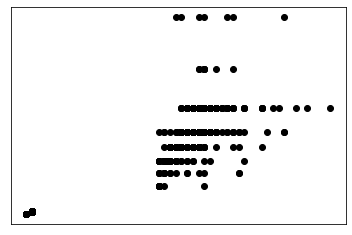

In [137]:
# Make predictions using the testing set
y_pred = reg.predict(X_train)

# The coefficients
print('Coefficients: \n', reg.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_train, y_pred))

# Plot outputs
plt.scatter(y_pred, y_train,  color='black')
#plt.plot(X_train, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [ ]:
nsample = 100
x = np.linspace(0, 10, 100)
X = np.column_stack((x, x**2))
beta = np.array([1, 0.1, 10])
e = np.random.normal(size=nsample)

In [ ]:
X = sm.add_constant(X)
y = np.dot(X, beta) + e

In [ ]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

In [107]:
python.__version__

NameError: name 'python' is not defined